## 1. Problem staterment

1.	Build a classification model to predict if the customer is going to churn or not
2.	Optimize the model using appropriate techniques
3.	Generate a set of insights and recommendations that will help the bank

### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler

# Library to split data
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)



# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.pipeline import Pipeline 




## 2. Load data

In [2]:
df = pd.read_csv('BankChurners.csv')


In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

## 3.Exploratory Data analysis

### 3.1 shape and data type

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

There are 10127 rows and 21 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Insights:

1. There is no missing values in any columns but there are few columns which has values  unknown and we may have to treat them as missing value.
2. We can convert the object type columns to categories.

### Fixing the data types

In [6]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [7]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

* we can see that the memory usage has decreased from 1.6 MB to 1.2 MB this technique is generally useful for bigger datasets.

### 3.2 Basic summary statistics and consequences

#### Central Tendency of data

In [9]:
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

#### Skewness

In [10]:
df.skew()

CLIENTNUM                   0.995601
Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

#### Insights:

1. `CLIENTNUM`: column can be dropped as it is simple Id.
2. `Customer_Age`: minmum age is 23 and maximum age is 73 with mean 46.3 and negatively skewed.
3. `Dependent_count`: minmum dependent count is 0 and maximum is 5.This is a categorical variable.
4. `Months_on_book` : minmum is 13 and maximum is 56 with mean 35.92 and slightly negative skewed. 
5. `Total_Relationship_Count` :min is 1 and max is 6 with mean 3.8 which does not make sense as relationship count should be only integer. this variable is negatively skewed and is categorical variable.
6. `Months_Inactive_12_mon` : Minimum  is 0  and maximum is 6. This column has positive skewness.
7. `Contacts_Count_12_mon` : Minimum  is 0 and maximum is 6. This column seems positively skewed.
8. `Credit_Limit` : Minimum  is 1438.3  and maximum is 34516. This column has positive skewness and seems having outliers.
9. `Total_Revolving_Bal` : minimum is 0 and maximum is 2517. This column definetely has negative skewness.
10. `Avg_Open_To_Buy`: min is 3 and max is 34516. This column is positively skewed and definetely have outliers.
11. `Total_Amt_Chng_Q4_Q1` : min is 0 and max is 3.39. it is positively skewed.
10. `Total_Trans_Amt`: Min is 510.0 and Max is 18484.0. This is positively skewed.
11. `Total_Trans_Ct` : Minimum is 10 and MAximum is 139. This is positively skewed.
12. `Total_Ct_Chng_Q4_Q1` : Minimum is 0 and Maximum is 3.714. This is positively skewed.
13. `Avg_Utilization_Ratio` : Minimum is 0 and Maximum is .99. This is positively skewed.


In [11]:
df.describe(include=['category']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

#### Insights

1. `Attrition_Flag`: almost 85% customers were `existing Customer`.
2. `Gender`: % of Female customer is higher than % of Male customers.
3. `Education_Level`: Count for graduate customer is highest.
4. `Marital_Status`: Count for `Married` customer is highest.
5. `Income_Category`:Count for customer with salary category 'Less than $40K' is highest.
6. `Card_Category`: Most frequent card category is `Blue`.


#### Checking caterogies for categorical variables

In [12]:
cols_cat= df.select_dtypes(['category'])

for col in cols_cat:
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts)
    print('\n\n')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64



F    5358
M    4769
Name: Gender, dtype: int64



Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64



Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64



Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64



Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64





* `Education_Level`,`Income_Category`,`Marital_Status` have some `unknown` values and needs to be handled.

In [13]:
cols = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
for col in cols:
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts)
    print('\n\n')

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64



3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64



3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64



3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64





`Attrition_Flag` is imbalanced which actually make this dataset imbalanced. We can do upsampling to balance this dataset.

### 3.3 Preprocessing of Data

  * `Education_Level`,`Income_Category`,`Marital_Status` have some `unknown` values and needs to be treated.

In [14]:
# Replacing Education_Level Unknown with Others
df["Education_Level"] = df["Education_Level"].replace("Unknown", "Others")
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Others           1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [15]:
# Replacing Marital_Status Unknown with Others
df["Marital_Status"] = df["Marital_Status"].replace("Unknown", "Others")
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Others       749
Divorced     748
Name: Marital_Status, dtype: int64

In [16]:
# Replacing Income_Category category Unknown by np.NAN.we can later handle it as missing value
df["Income_Category"] = df["Income_Category"].replace("Unknown", np.NAN)
df['Income_Category'].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: Income_Category, dtype: int64

### 3.4 Univariate and Bivariate Analysis

### 3.4.a Univariant Plots continuous variables

In [17]:
##Methods to plot box plot and histgram for  features
def histgram_BoxPlot(feature, figsize=(15,10)):
    f2, (ax_box, ax_hist) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                  sharex = True, # x-axis will be shared among all subplots
                  gridspec_kw = {"height_ratios": (.25, .75)}, 
                  figsize = figsize 
                 ) # creating the 2 subplots
    sns.distplot(feature,ax=ax_hist, kde= True)
    sns.boxplot(feature, ax=ax_box,showmeans=True, color= 'Green')
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')# Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### plots for Customer_Age

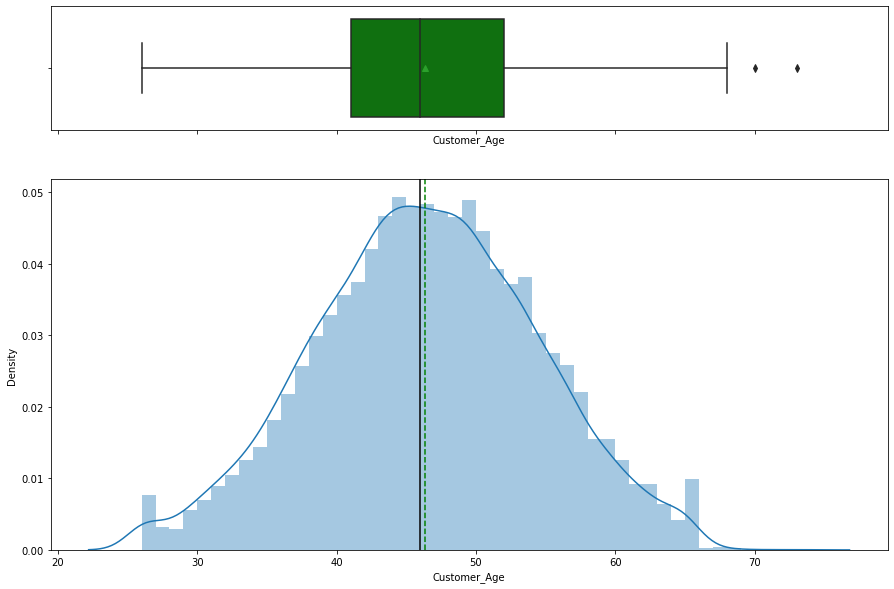

In [18]:
histgram_BoxPlot(df['Customer_Age']);

#### Insights:

`Customer_Age` : There are some outliers at age 70, 73. in experience variable but it is negatively skewed.

#### Plot for Dependent_count

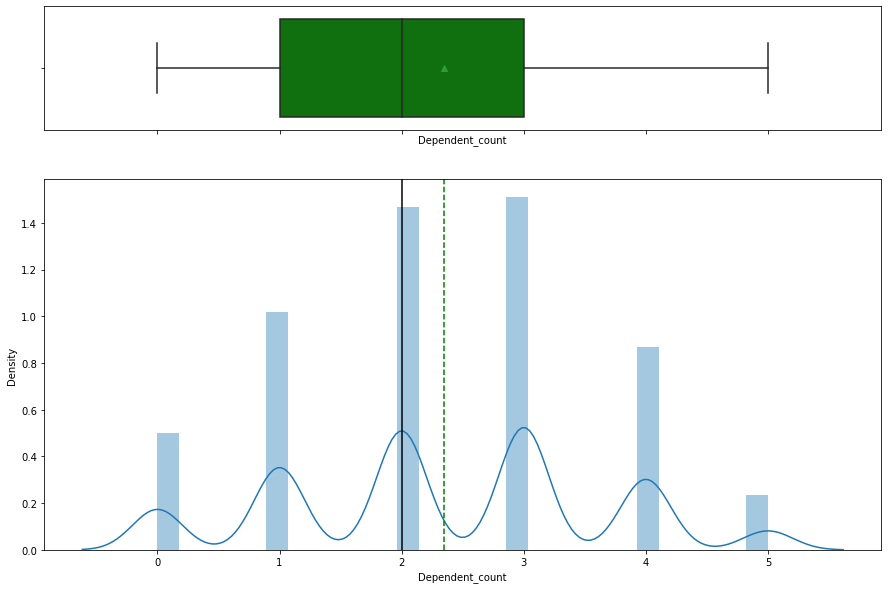

In [19]:

histgram_BoxPlot(df['Dependent_count']);

#### Insights:

`Dependent_count` : There is n outliers. Highest density is for dependent count 3. It is negatively skewed.


#### Plot for Months_on_book

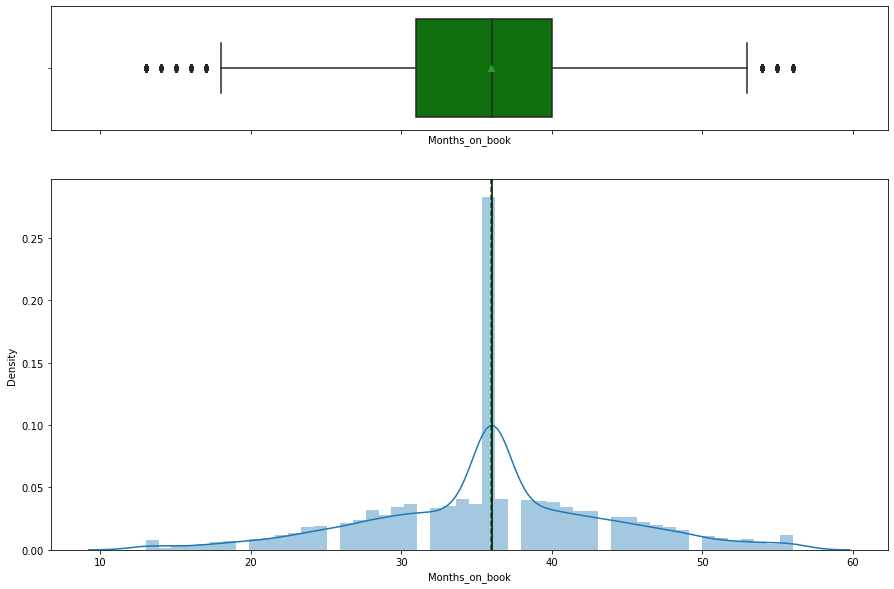

In [20]:
histgram_BoxPlot(df['Months_on_book']);

In [21]:
df['Months_on_book'].median()

36.0

#### Insights

`Months_on_book` : It has outliers and negatively skewed. Median for this variable is 36.0.


#### Plot for Total_Relationship_Count

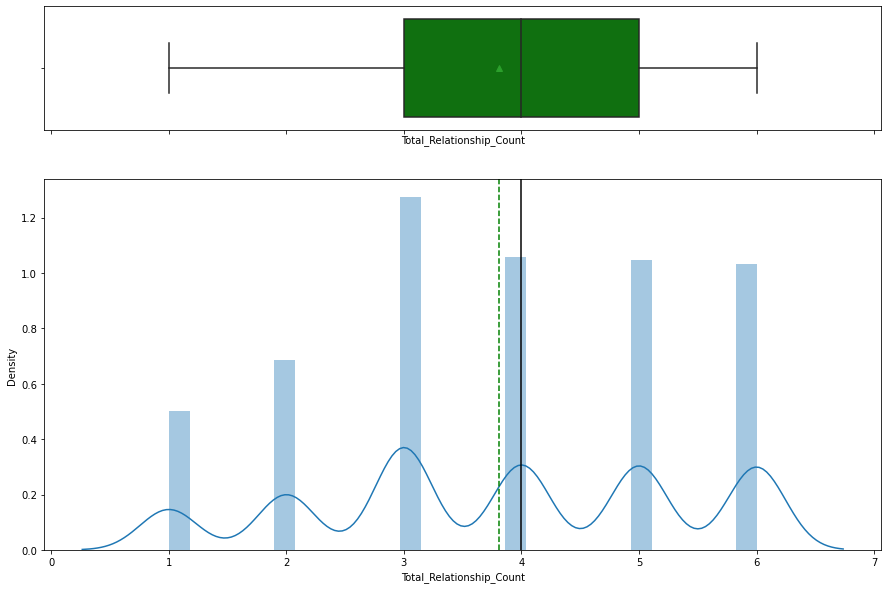

In [22]:
histgram_BoxPlot(df['Total_Relationship_Count']);

In [23]:
df['Total_Relationship_Count'].median()

4.0

#### Insights:

`Total_Relationship_Count` : Total_Relationship_Count variable has no outlier and is negatively skewed.Median for Total_Relationship_Count is 4.

#### Plot for Months_Inactive_12_mon

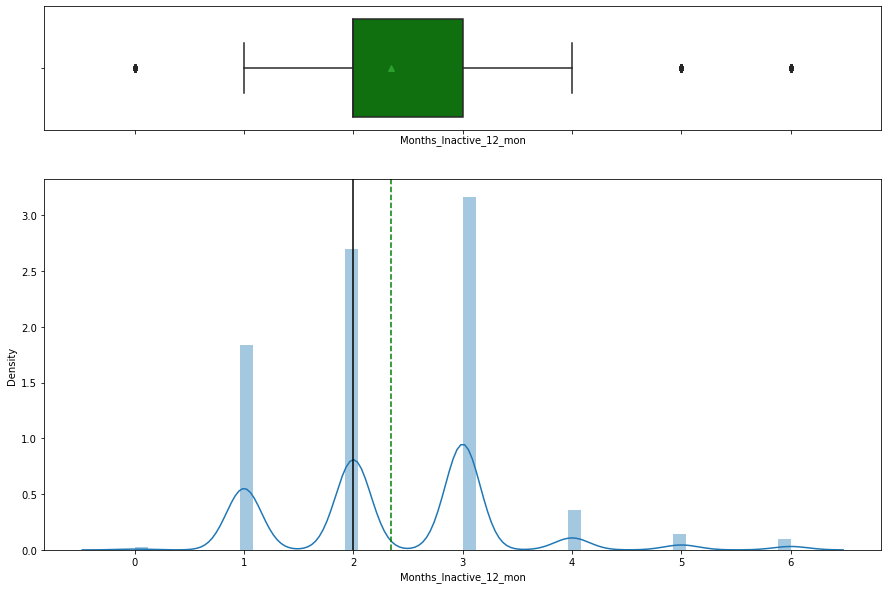

In [24]:
histgram_BoxPlot(df['Months_Inactive_12_mon']);

#### Insights:

`Months_Inactive_12_mon` : There are some outliers at 0, 5 and 6. It is highly positively skewed. Median is at 2.

#### plot for Contacts_Count_12_mon

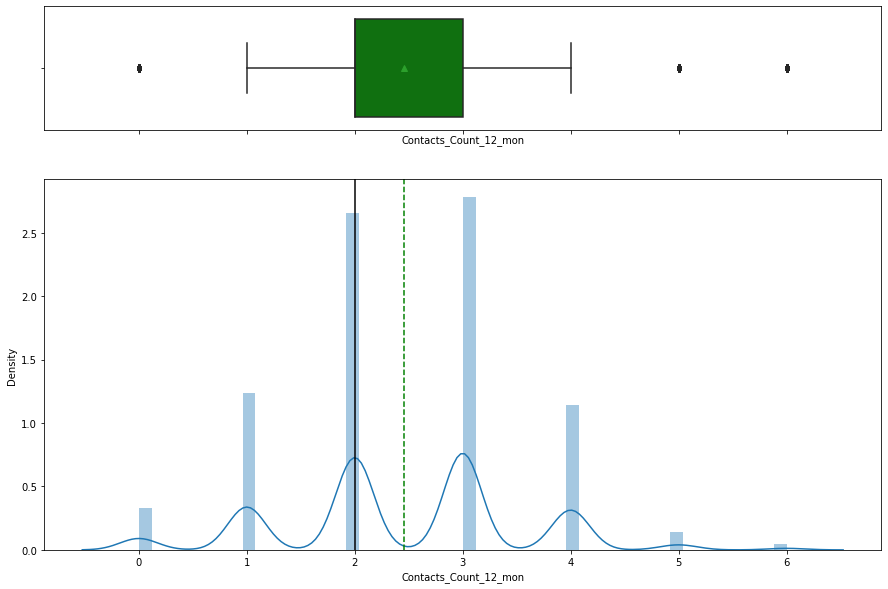

In [25]:
histgram_BoxPlot(df['Contacts_Count_12_mon']);

#### Insights:

 `Contacts_Count_12_mon` : it has outliers at 0,5 and 6 and has positive skewness. Median is at 2.


#### plot for Credit_Limit

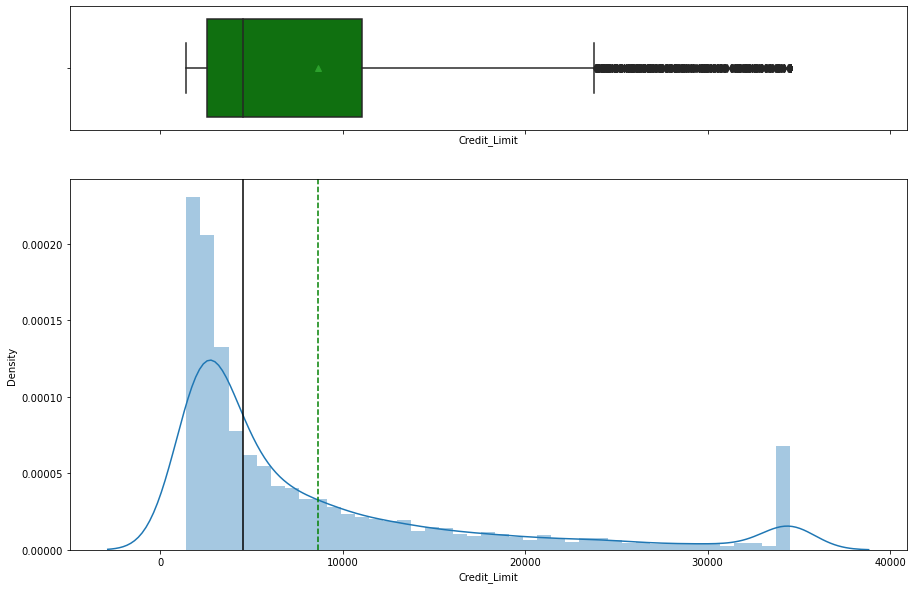

In [26]:
histgram_BoxPlot(df['Credit_Limit']);

In [27]:
df['Credit_Limit'].median()

4549.0

#### Insights:

 `Credit_Limit` : it has too many outliers and is  highly positively skewed.


#### plot for Total_Revolving_Bal 

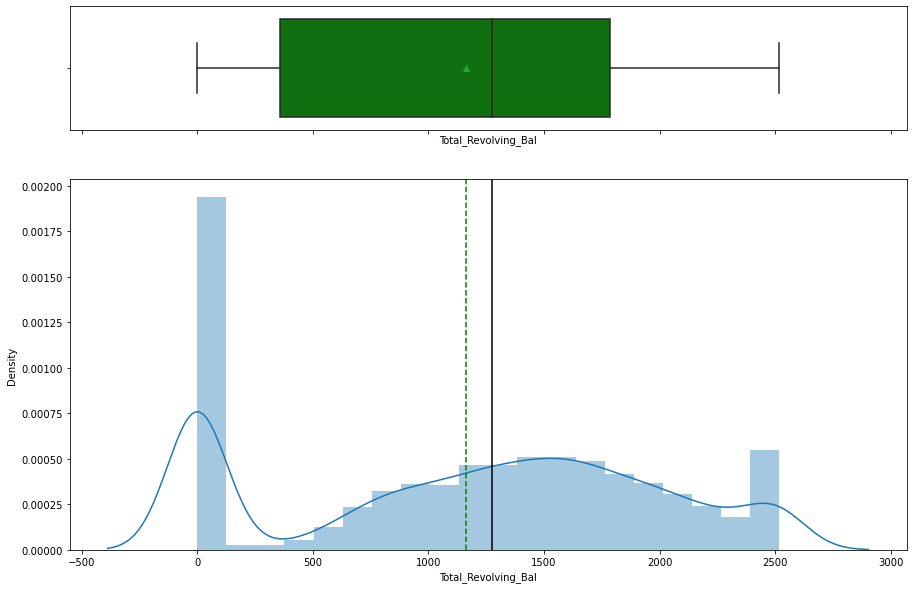

In [28]:
histgram_BoxPlot(df['Total_Revolving_Bal']);

#### Insights:

`Total_Revolving_Bal` : it has no outliers but negatively skewed. Its curve is not proper bell distribution curve.

#### plot for Avg_Open_To_Buy

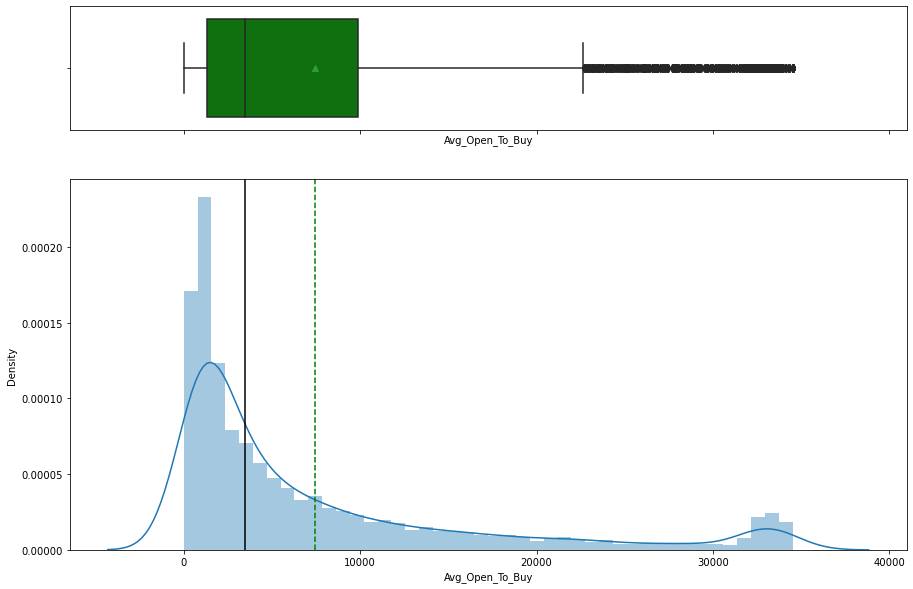

In [29]:
histgram_BoxPlot(df['Avg_Open_To_Buy']);

#### Insights:

 `Avg_Open_To_Buy` : it has too many outliers and highly positively skewed.

#### plot for Total_Amt_Chng_Q4_Q1

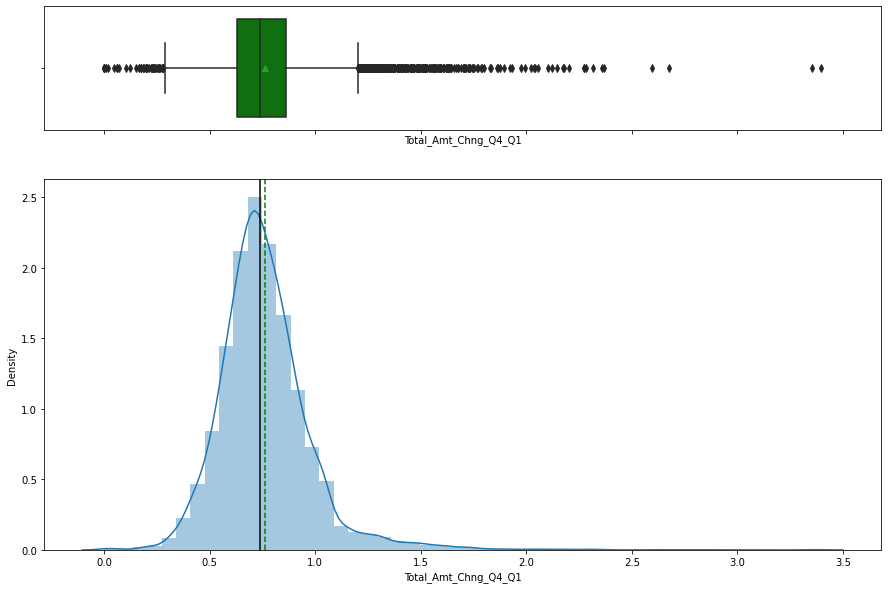

In [30]:
histgram_BoxPlot(df['Total_Amt_Chng_Q4_Q1']);

#### Insights:

 `Total_Amt_Chng_Q4_Q1` : It has too many outliers and highly positively skewed.

#### plot for Total_Trans_Amt

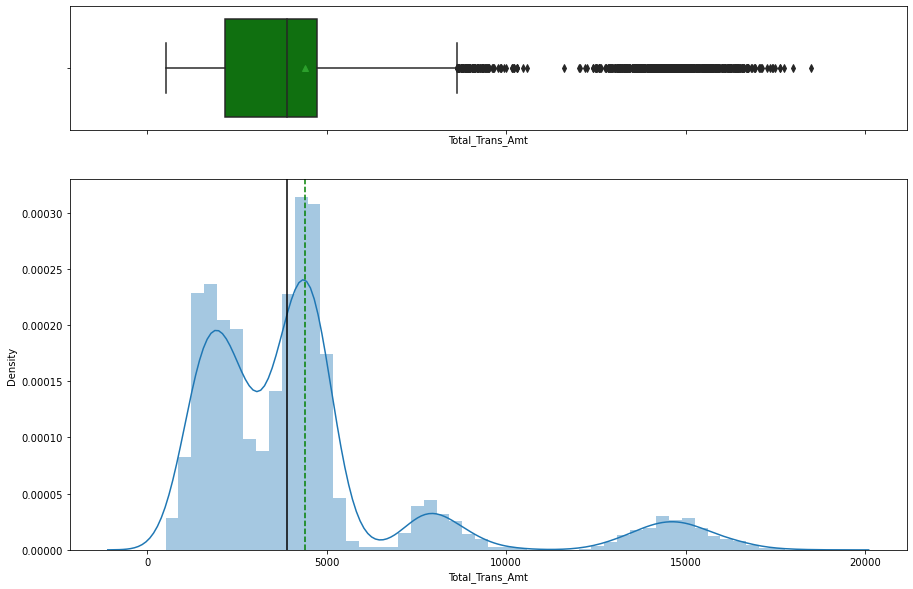

In [31]:
histgram_BoxPlot(df['Total_Trans_Amt']);

#### Insights:

 `Total_Trans_Amt` : it has too many outliers and highly positively skewed.

#### plot for Total_Trans_Ct

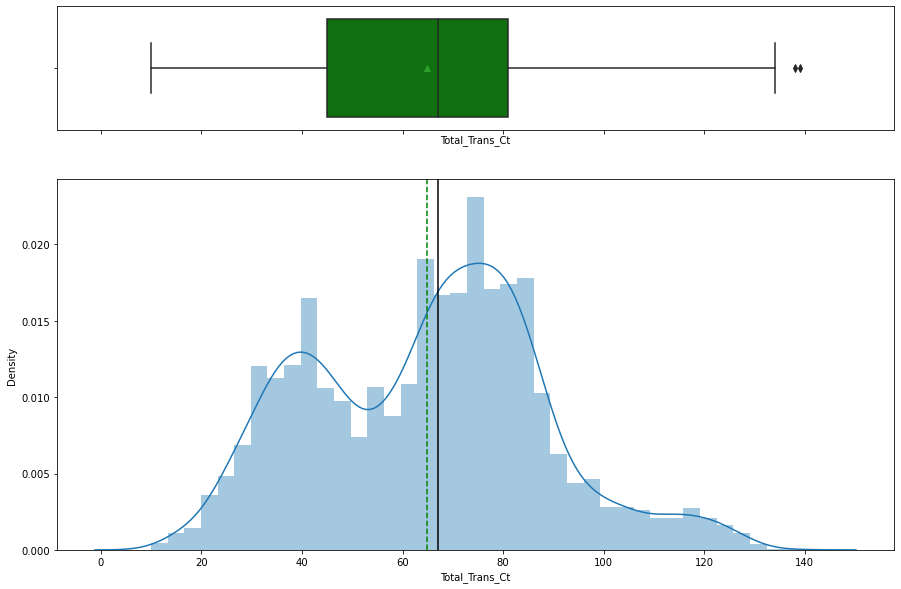

In [32]:
histgram_BoxPlot(df['Total_Trans_Ct']);

#### Insights:

 `Total_Trans_Ct` : it has outliers and positively skewed.

#### plot for Total_Ct_Chng_Q4_Q1

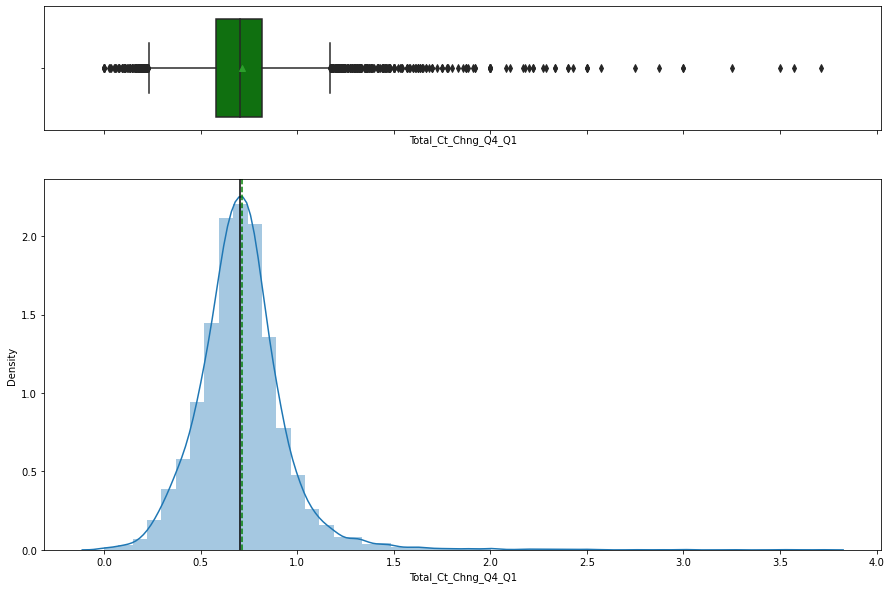

In [33]:
histgram_BoxPlot(df['Total_Ct_Chng_Q4_Q1']);

#### Insights:

 `Total_Ct_Chng_Q4_Q1` : it has too many outliers and highly positively skewed.

#### plot for Avg_Utilization_Ratio

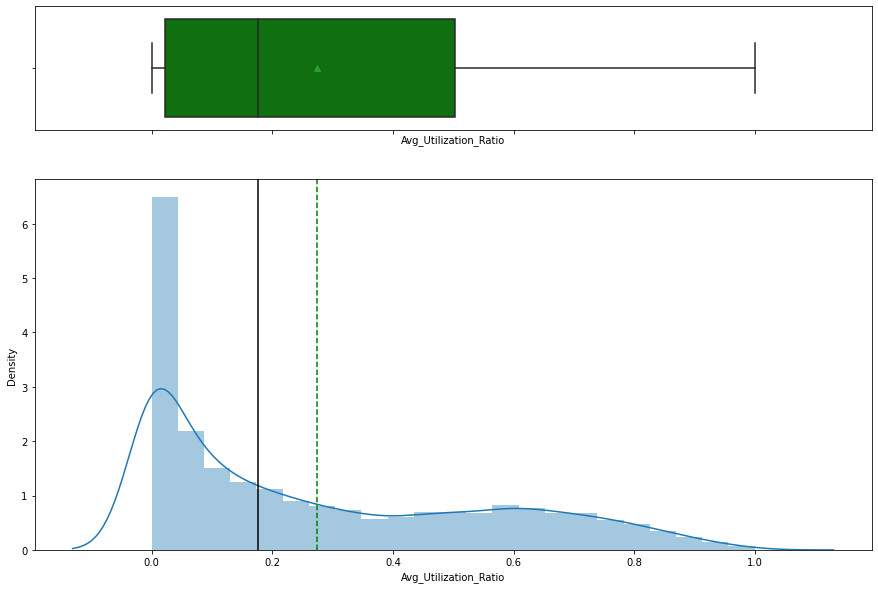

In [34]:
histgram_BoxPlot(df['Avg_Utilization_Ratio']);

#### Insights:

 `Avg_Utilization_Ratio` : it has no outliers but positively skewed.

### 3.4.b Univariant plot for categorical variables

In [35]:
##Method to plot bar plot with percentage for each category of featrure
def barPlot_percentDist(feature):
    total = len(df[feature])# total size of column
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=45)
    ax=sns.countplot(df[feature],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage 
    plt.show() # show the plot
  

#### Plot for Attrition_Flag

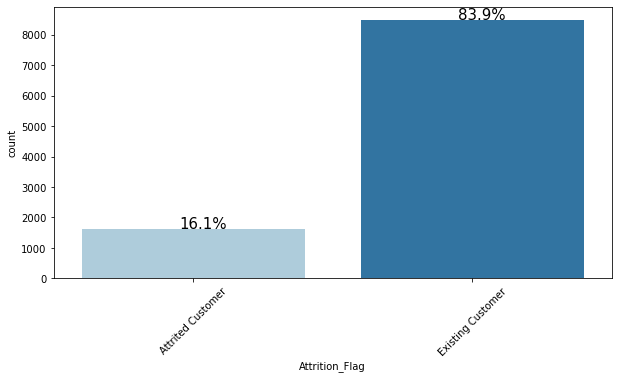

In [36]:
barPlot_percentDist('Attrition_Flag')

* Majority of customers has their accounts still opened with bank.

#### Plot for Gender	

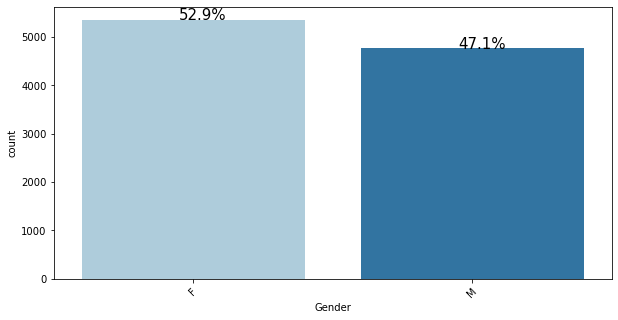

In [37]:
barPlot_percentDist('Gender')

* 52.0.5% of the customer are females which is followed by 47.2% male.

#### Plot for Education_Level

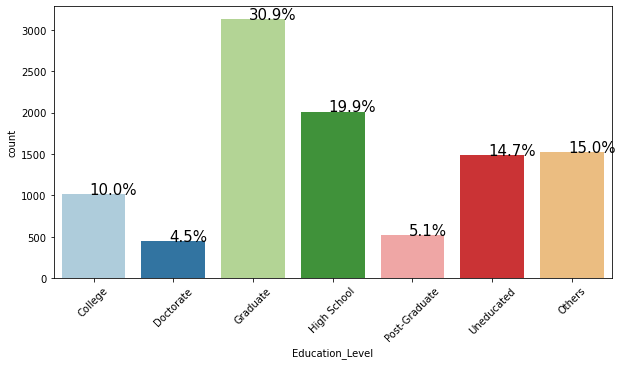

In [38]:
barPlot_percentDist('Education_Level')

* 30.9% of customer are graduate followed by 19.9% high school.

#### Plot for Marital_Status

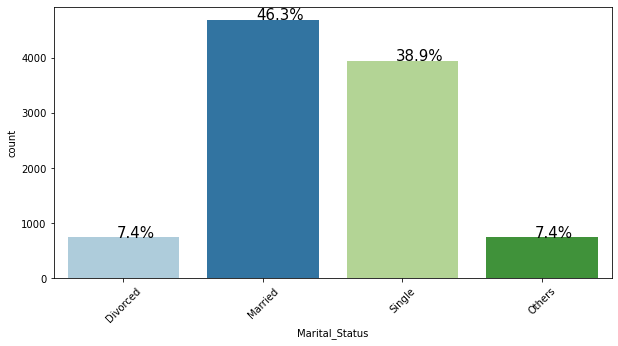

In [39]:
barPlot_percentDist('Marital_Status')

* 46.3% customers are married folowed by 38.9% customers are single.

#### Plot for Income_Category

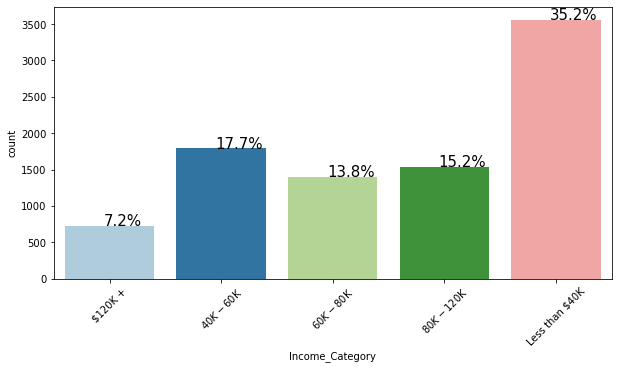

In [40]:
barPlot_percentDist('Income_Category')

* 35.2%  customers have income category "less than 40K" followed by 17.7%.

#### Plot for Card_Category

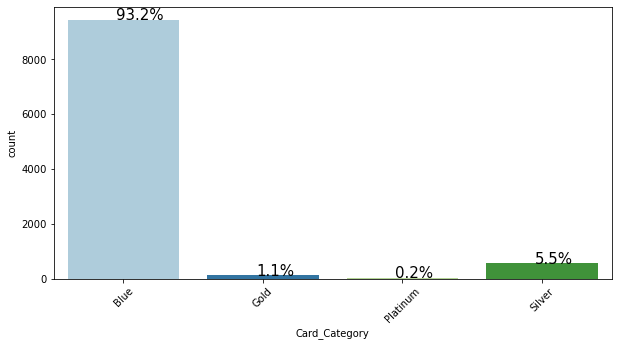

In [41]:
barPlot_percentDist('Card_Category')

* Most of customers (93.2%) have blue card.

#### Plot for Dependent_count

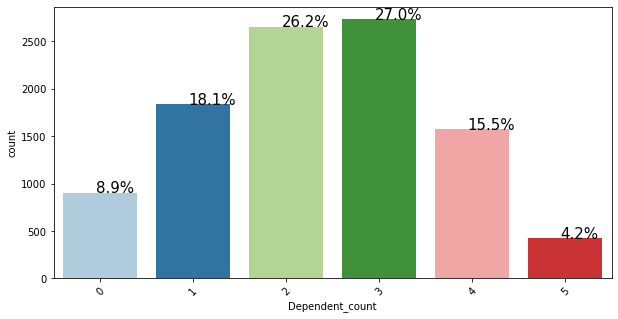

In [42]:
barPlot_percentDist('Dependent_count')

* 27% customers have dependent count 3 followed by 26.2% customer with 2 dependent count.

#### Plot for Total_Relationship_Count

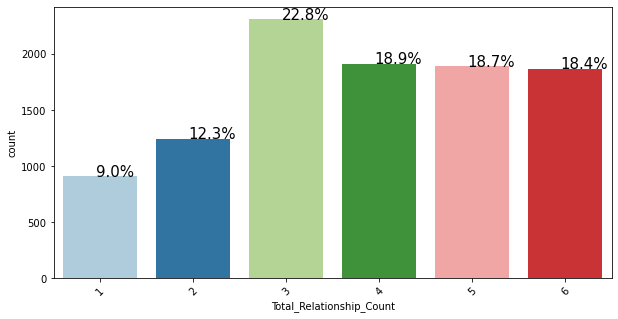

In [43]:
barPlot_percentDist('Total_Relationship_Count')

* 22.8% customers has 3 products with bank followed by 18.9% customers with 4 product.

#### plot for •Months_Inactive_12_mon

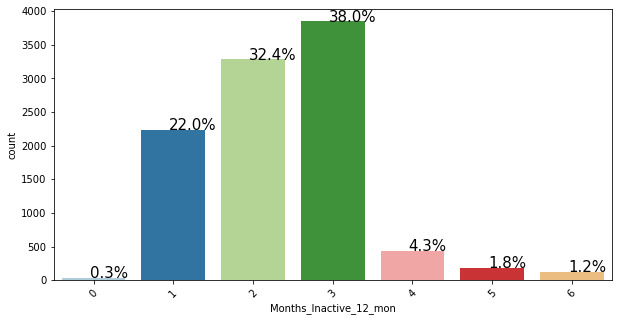

In [44]:
barPlot_percentDist('Months_Inactive_12_mon')

* 38.0% customer are inactive from last 3 months followed by 32.4% customers are inactive from last 2 months.

#### plot for 	Contacts_Count_12_mon	

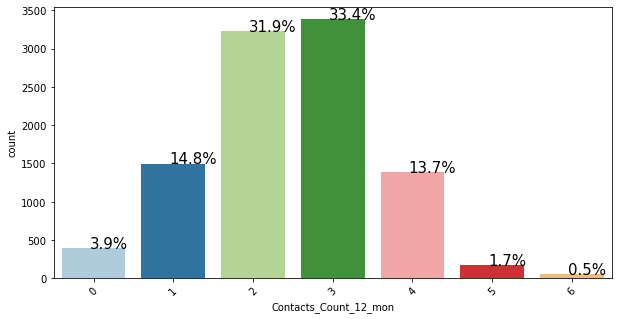

In [45]:
barPlot_percentDist('Contacts_Count_12_mon')

* 62% customers have their own cars.

### 3.4.c Bivariant Plots

#### 1. pair plot
plotting relationship of continuous variables with each other and Attrition_Flag variable

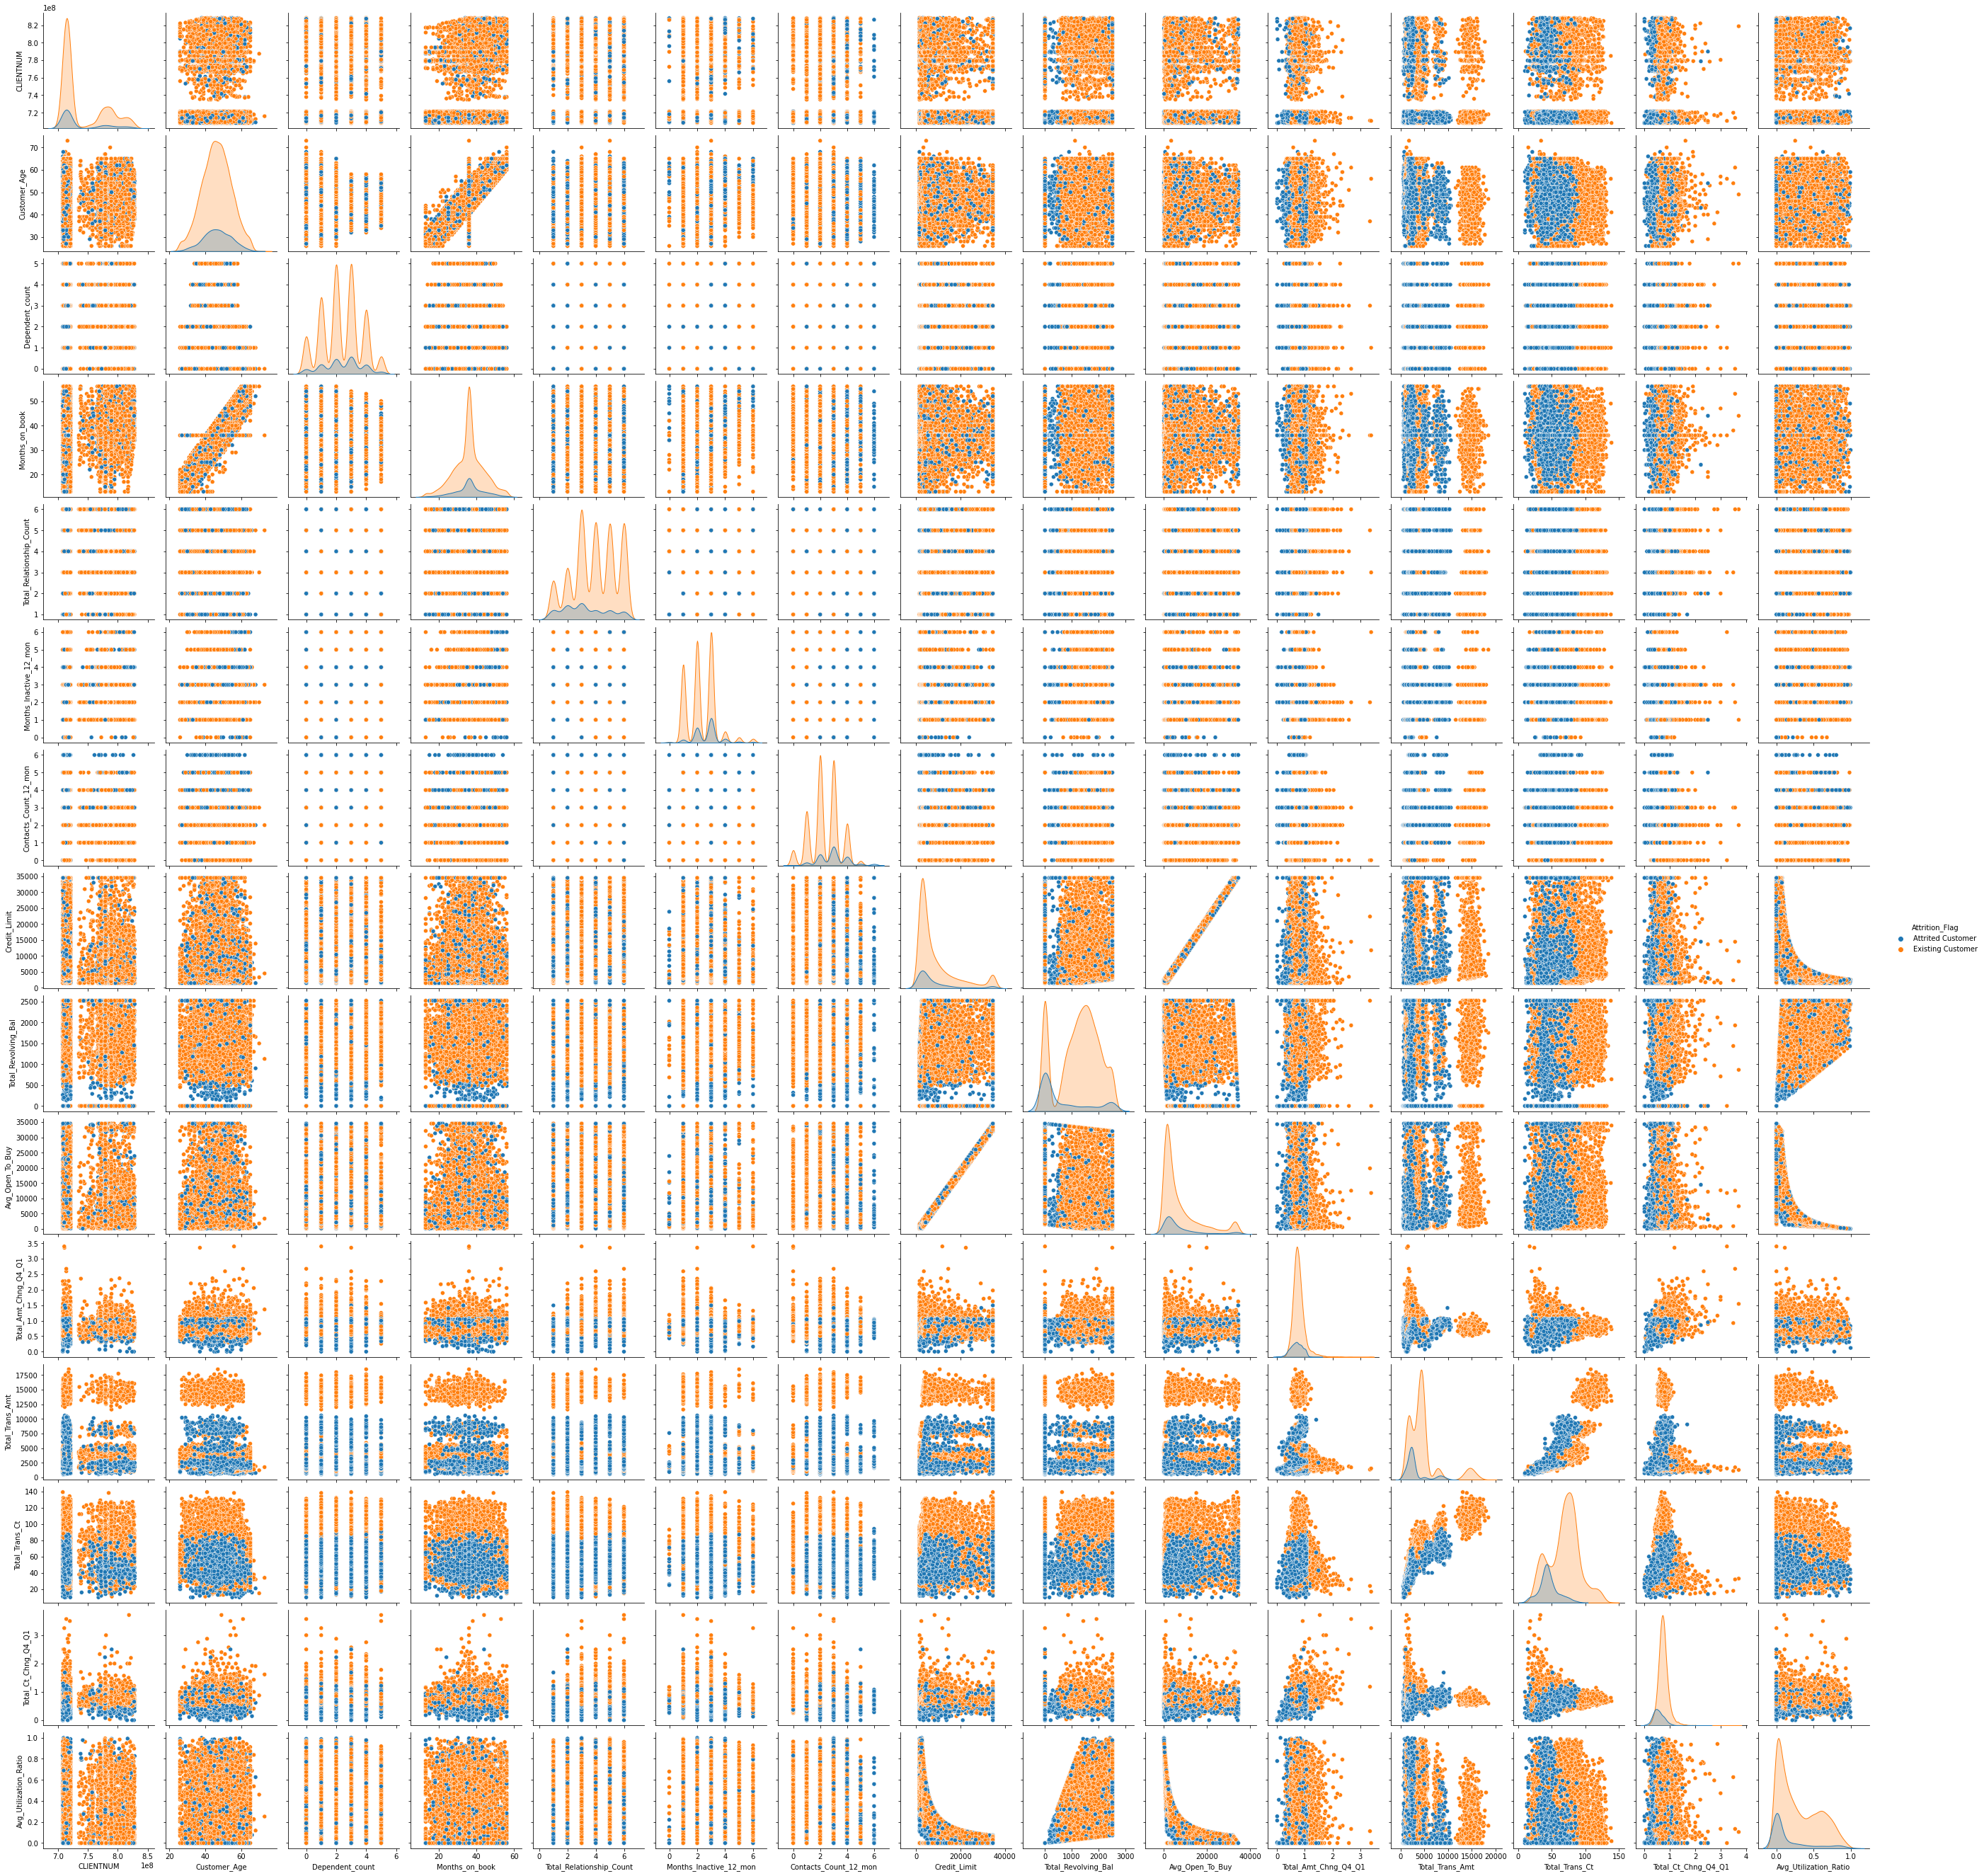

In [46]:
sns.pairplot(df,hue='Attrition_Flag')




* This plot show that most of the variables have non-linear relationships to each other except credit_limit and Avg_open_to_buy have linear relationship.


#### 2. HeatMap

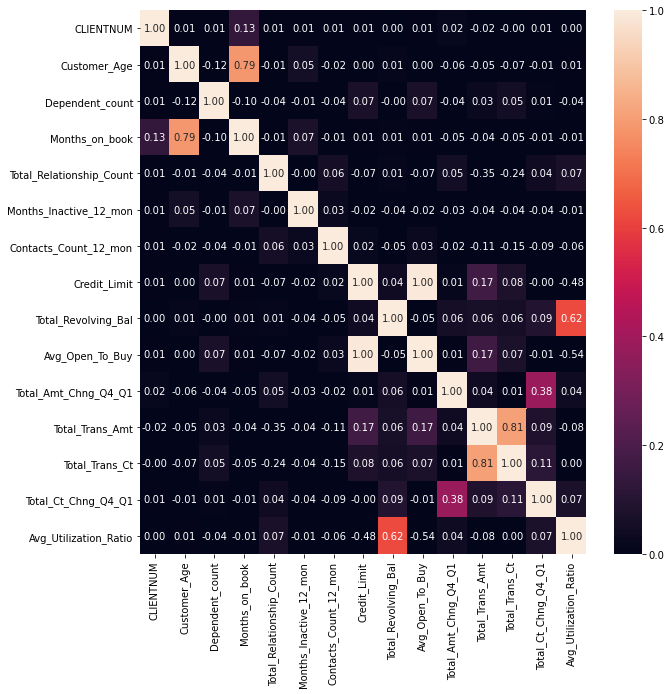

In [47]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),vmin=0,vmax=1,fmt='.2f',annot=True)
plt.show()

* There are few variables which are highly corelated:
** Total_revolving_Bal is highly corelated to Avg_Utilization_Ratio.
** Total_trans_Amt is highly correlated to Total_Trans_ct.
** Months_On_Book is highly corelated to customer_age.
** credit_limit has linear relations to Avg_open_to_buy and we can drop `Avg_Open_To_Buy`


#### 3. Line Plot

#### Total_trans_Amt and Total_Trans_ct are highly corelated, lets check if they have linear relationship

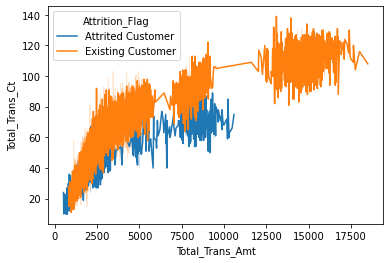

In [48]:
sns.lineplot(x='Total_Trans_Amt',y='Total_Trans_Ct', data=df, hue= 'Attrition_Flag');

* IT's not proper linear relationship between total_trans_Ct and Total_Trans_Amt. So we can keep both of gthem.

#### Months_On_Book and customer_age are highly corelated, lets check if they have linear relationship

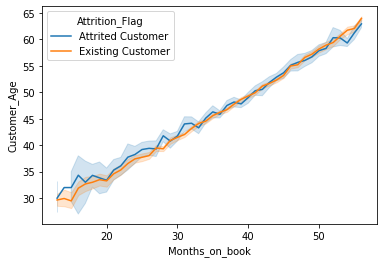

In [49]:
sns.lineplot(x='Months_on_book',y='Customer_Age', data=df, hue= 'Attrition_Flag');

`Months_on_book` and `Customer_Age` have a linear relationship so we can drop on of them. We will drop  `Months_on_book`

#### 4. Stacked Plot :

#### Plotting relationship of customer's information  with Attrition_Flag

In [50]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


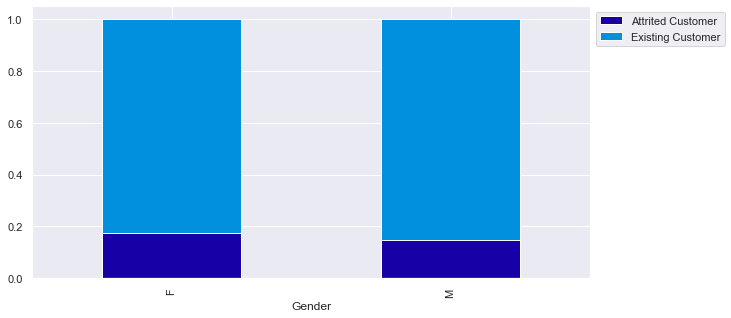

In [51]:
cols = df[['Gender','Education_Level','Marital_Status','Income_Category','Card_Category','Contacts_Count_12_mon','Months_Inactive_12_mon','Total_Relationship_Count',
'Dependent_count']].columns.tolist()

stacked_plot(df['Gender'])          

* Only less than 20% female customers  and less than 20% male customers closed the accounts. More female customers have closed accounts than male customers. 

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Others                         256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


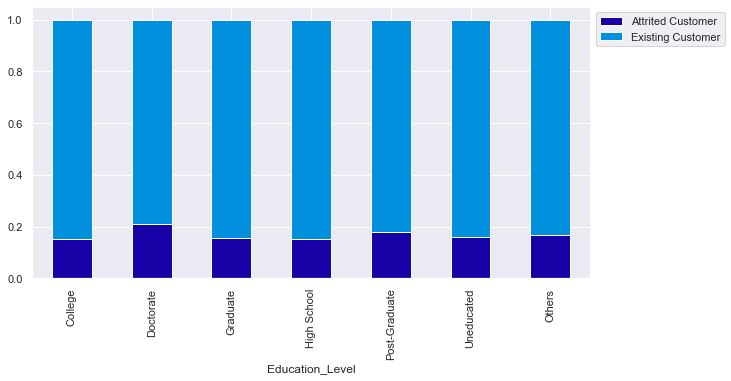

In [52]:
#Education_Level
stacked_plot(df['Education_Level'])

* More than 20% customers who have Doctorate, closed their accounts followed byalmsot 20% customers with post graduation.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Others                        129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


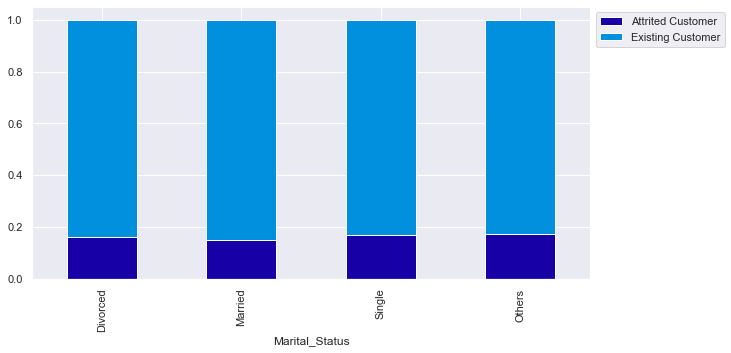

In [53]:
#Marital_Status
stacked_plot(df['Marital_Status'])

* There is no major difference between the percentages for different marital status.

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
$120K +                        126                601   727
$40K - $60K                    271               1519  1790
$60K - $80K                    189               1213  1402
$80K - $120K                   242               1293  1535
Less than $40K                 612               2949  3561
All                           1440               7575  9015
------------------------------------------------------------------------------------------------------------------------


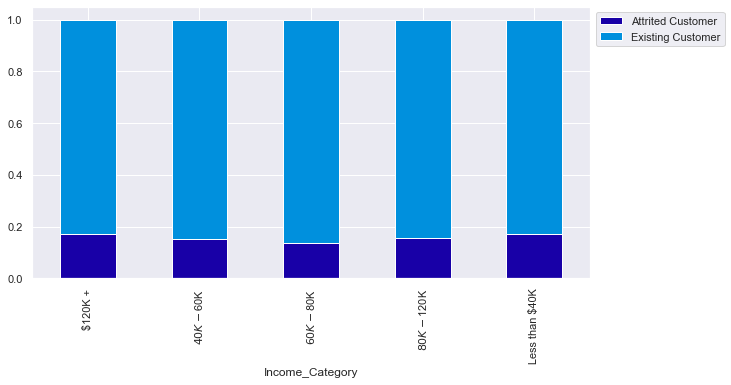

In [54]:
stacked_plot(df['Income_Category'])

* There is no major difference between percentage for customers who closed accounts for different income range.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


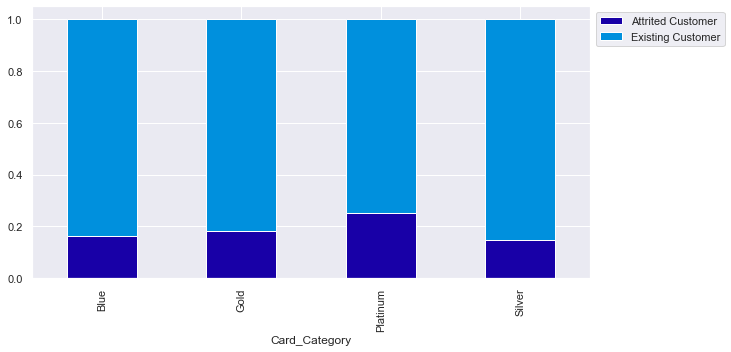

In [55]:
stacked_plot(df['Card_Category'])

* 25% customers who had platinium card , had closed the account followed by almost 20% customers with gold card, closed the account.

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


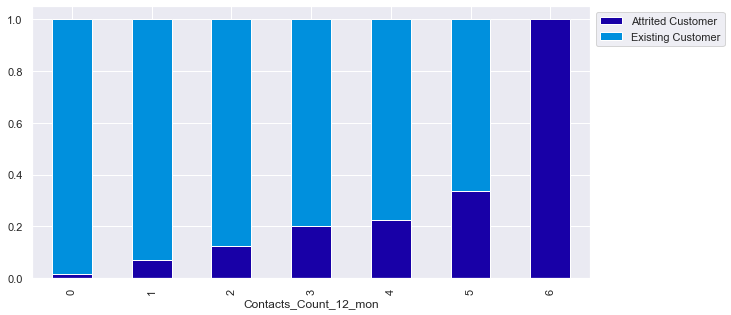

In [56]:
stacked_plot(df['Contacts_Count_12_mon'])

* 100% customer who had total 6 contact in last 12 months, had closed the account follwoed by customer with 5 contacts in lasyt 6 months.

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


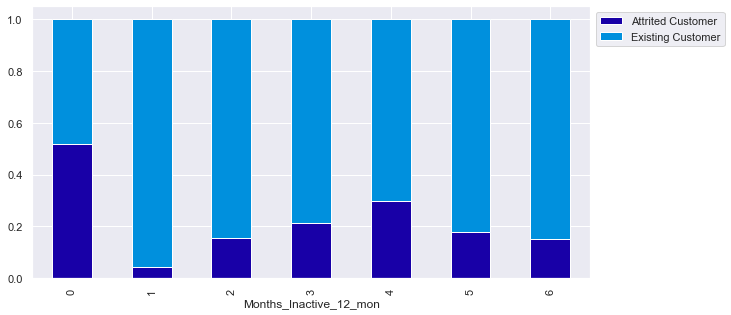

In [57]:
stacked_plot(df['Months_Inactive_12_mon'])

* percentage of customer who have 0 inactive month is highest but it can also mean that these customers have also closed the accounts. Customers who have 4 inactive months in last 12 months is almost 30% followed by 20% customers with 3 inactive months.

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


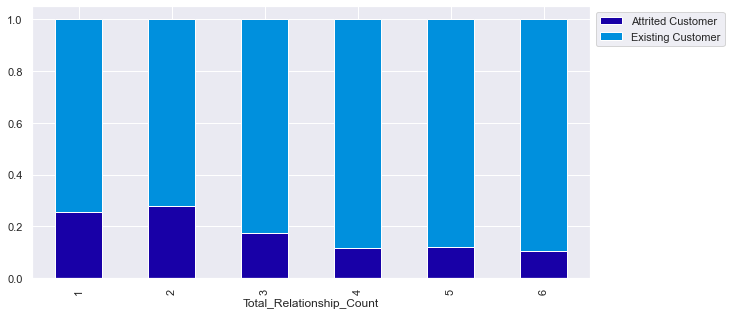

In [58]:
stacked_plot(df['Total_Relationship_Count'])

* Almost 30% cutomers who have 2 products had closed the accounts followed by 25-30% customers with 1 product. 
* So customer with higher number of products with banks tend to not close the account.

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


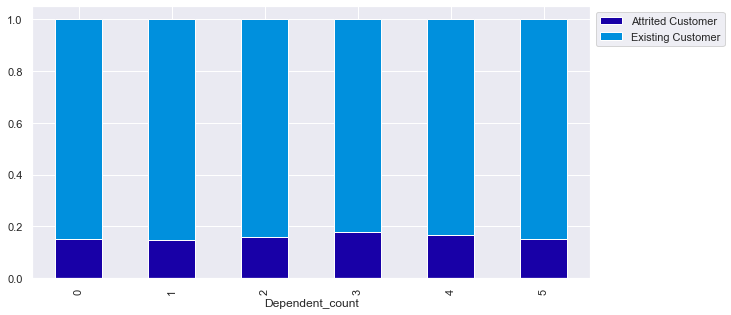

In [59]:
stacked_plot(df['Dependent_count'])

* There is no significant difference betwwen the percentage of customers who closed accounts with different dependent count.

#### 5. Box Plot

####  Bivariant plot between continuous variable and Attrition_Flag

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

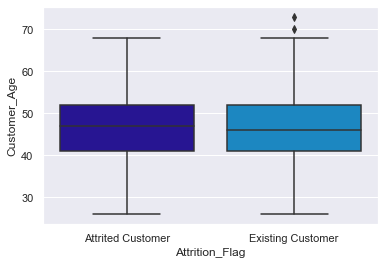

In [60]:
sns.boxplot(x='Attrition_Flag',y='Customer_Age',data= df)

* There is no difference between the range of age for customers who closed accounts and did not closed accounts.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_on_book'>

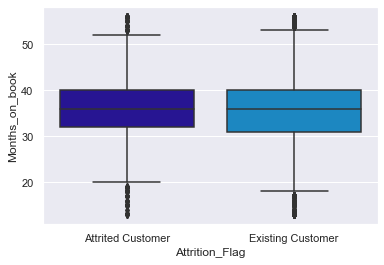

In [61]:
sns.boxplot(x='Attrition_Flag',y='Months_on_book',data= df)

* There is no difference between the months_on_book for customers who closed accounts and did not closed accounts.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

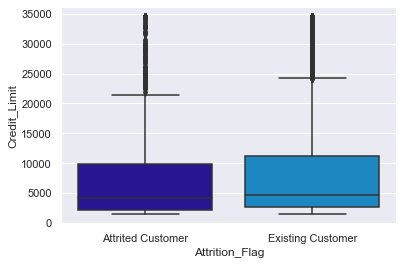

In [62]:
sns.boxplot(x='Attrition_Flag',y='Credit_Limit',data= df)

* There is no difference between the credit limit for customers who closed accounts and did not closed accounts.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

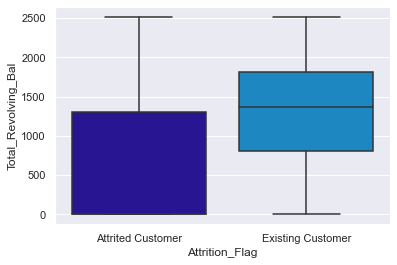

In [63]:
sns.boxplot(x='Attrition_Flag',y='Total_Revolving_Bal',data= df)

* Total revolving balance is lower for customer who closed the accounts.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

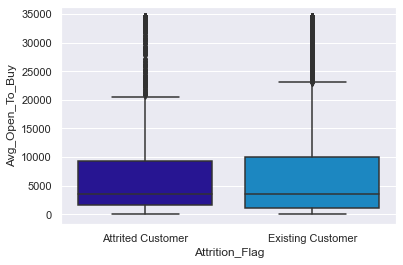

In [64]:
sns.boxplot(x='Attrition_Flag',y='Avg_Open_To_Buy',data= df)

* There is no difference between the amount left to buy on creditcard for customers who closed accounts and did not closed accounts.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

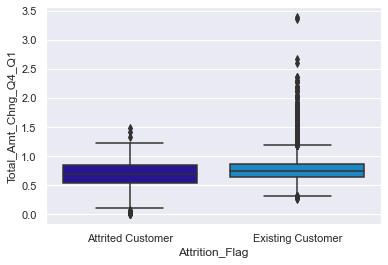

In [65]:
sns.boxplot(x='Attrition_Flag',y='Total_Amt_Chng_Q4_Q1',data= df)

* There is no difference between transaction counts ratio for customers who closed accounts and did not closed accounts.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

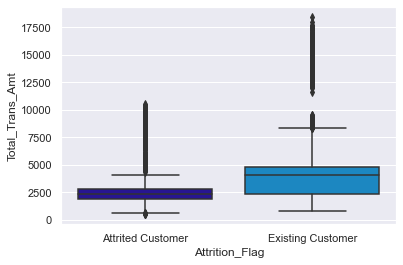

In [66]:
sns.boxplot(x='Attrition_Flag',y='Total_Trans_Amt',data= df)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

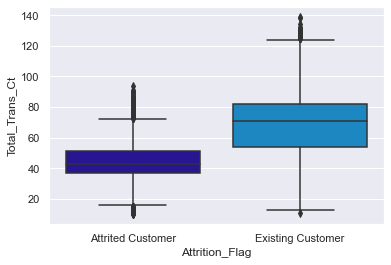

In [67]:
sns.boxplot(x='Attrition_Flag',y='Total_Trans_Ct',data= df)

* Total transaction amount in last 12 months is lower for customers who closed the accounts.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

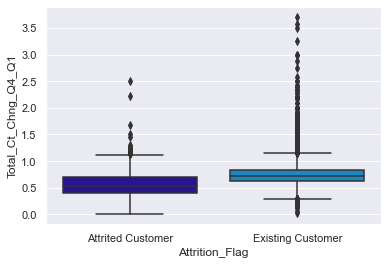

In [68]:
sns.boxplot(x='Attrition_Flag',y='Total_Ct_Chng_Q4_Q1',data= df)

* Ratio of total transaction count of 4th QT and 1st QT is lower for customers who closed the accounts.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

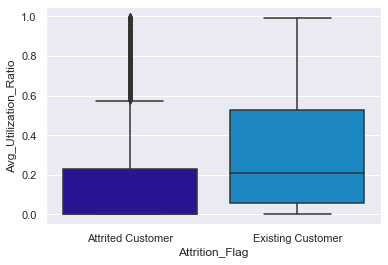

In [69]:
sns.boxplot(x='Attrition_Flag',y='Avg_Utilization_Ratio',data= df)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

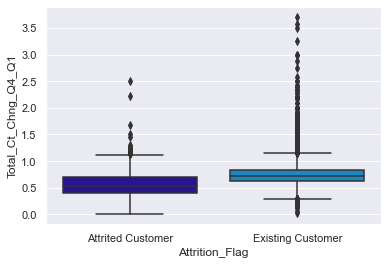

In [70]:
#Total_Ct_Chng_Q4_Q1
sns.boxplot(x='Attrition_Flag',y='Total_Ct_Chng_Q4_Q1',data= df)

* Total spending from available credit is lower for customers who have closed accounts.

#### 6. Line plot

#### plot between Avg_Utilization_Ratio, Customer_Age and Attrition_Flag

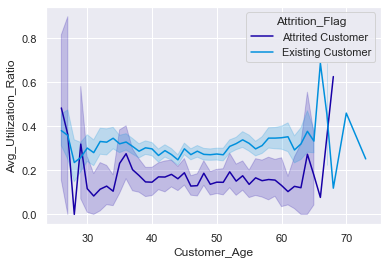

In [71]:
sns.lineplot(x='Customer_Age',y='Avg_Utilization_Ratio', data=df, hue= 'Attrition_Flag');

* Average utilization ratio is lower for attrited customer than existing customer of same age.

#### Plot between Total_Trans_Amt, Customer_Age and Attrition_Flag

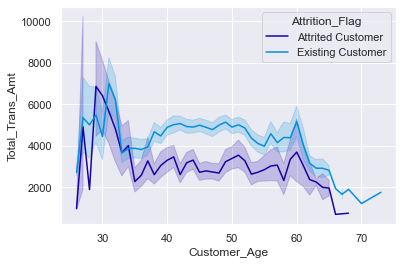

In [72]:
sns.lineplot(x='Customer_Age',y='Total_Trans_Amt', data=df, hue= 'Attrition_Flag');

* Total transaction amount is decresing after customer age 60 and increasing till 30.
* Total transaction amount is lower for attrited customer than existing customer of same age.

#### Plot between Total_Revolving_Bal, Customer_Age and Attrition_Flag

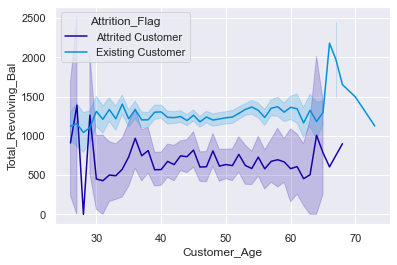

In [73]:
sns.lineplot(x='Customer_Age',y='Total_Revolving_Bal', data=df, hue= 'Attrition_Flag');

* Total revolving balance for attrited customer is lower than the existing customer of same age.

#### Plot between Credit_Limit, Customer_Age and Attrition_Flag

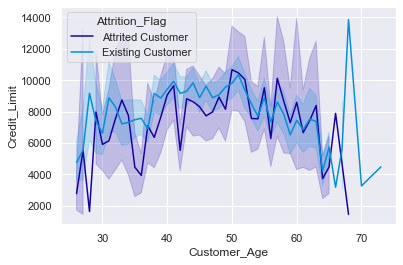

In [74]:
sns.lineplot(x='Customer_Age',y='Credit_Limit', data=df, hue= 'Attrition_Flag');

* There is no significant difference between credit limit for attrited customers and existing customers of same age.

#### 7. Category Plot

#### Plot of Dependent_count, Customer_Age and Education_Level with Attrition_Flag

<Figure size 2880x2880 with 0 Axes>

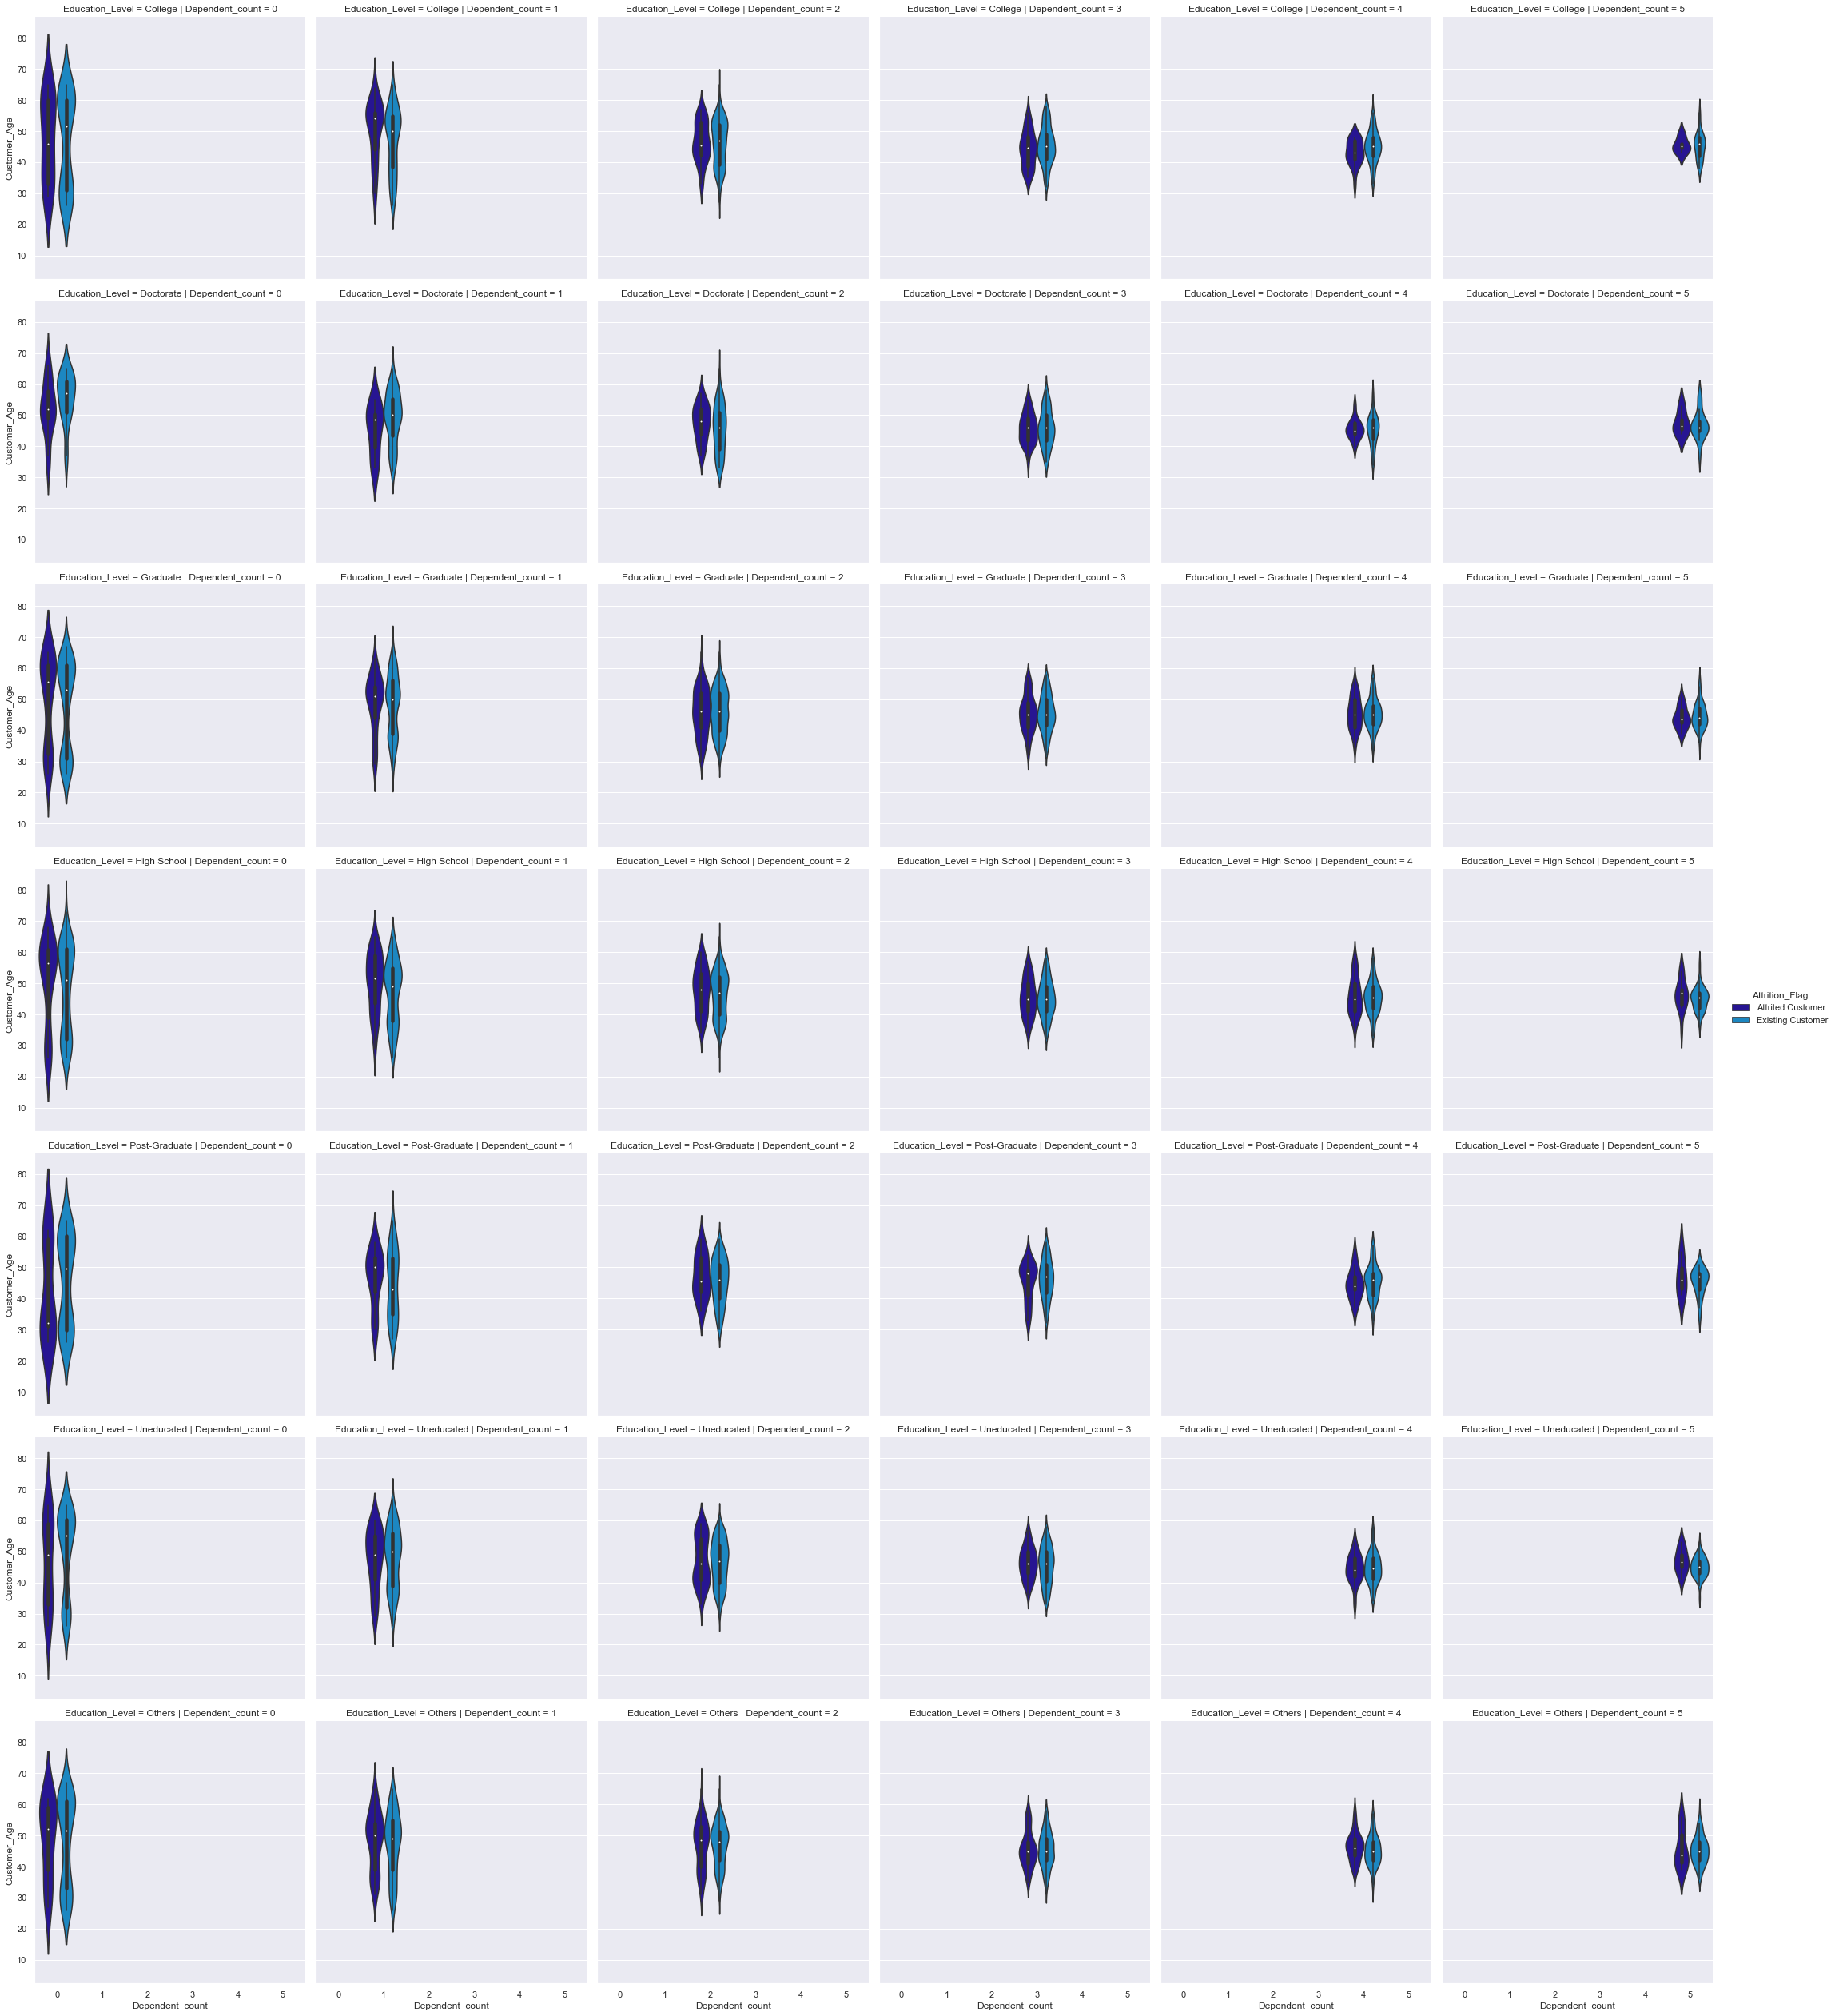

In [75]:


plt.figure(figsize=(40,40))
sns.catplot(x ='Dependent_count', y = 'Customer_Age',row = 'Education_Level',col = 'Dependent_count',hue='Attrition_Flag',data = df, kind = 'violin' );
plt.show()

* There is no difference between attrited customer and existing customers.



#### Plot of Card_Category, Customer_Age and Total_Relationship_Count with Attrition_Flag

<Figure size 2880x2880 with 0 Axes>

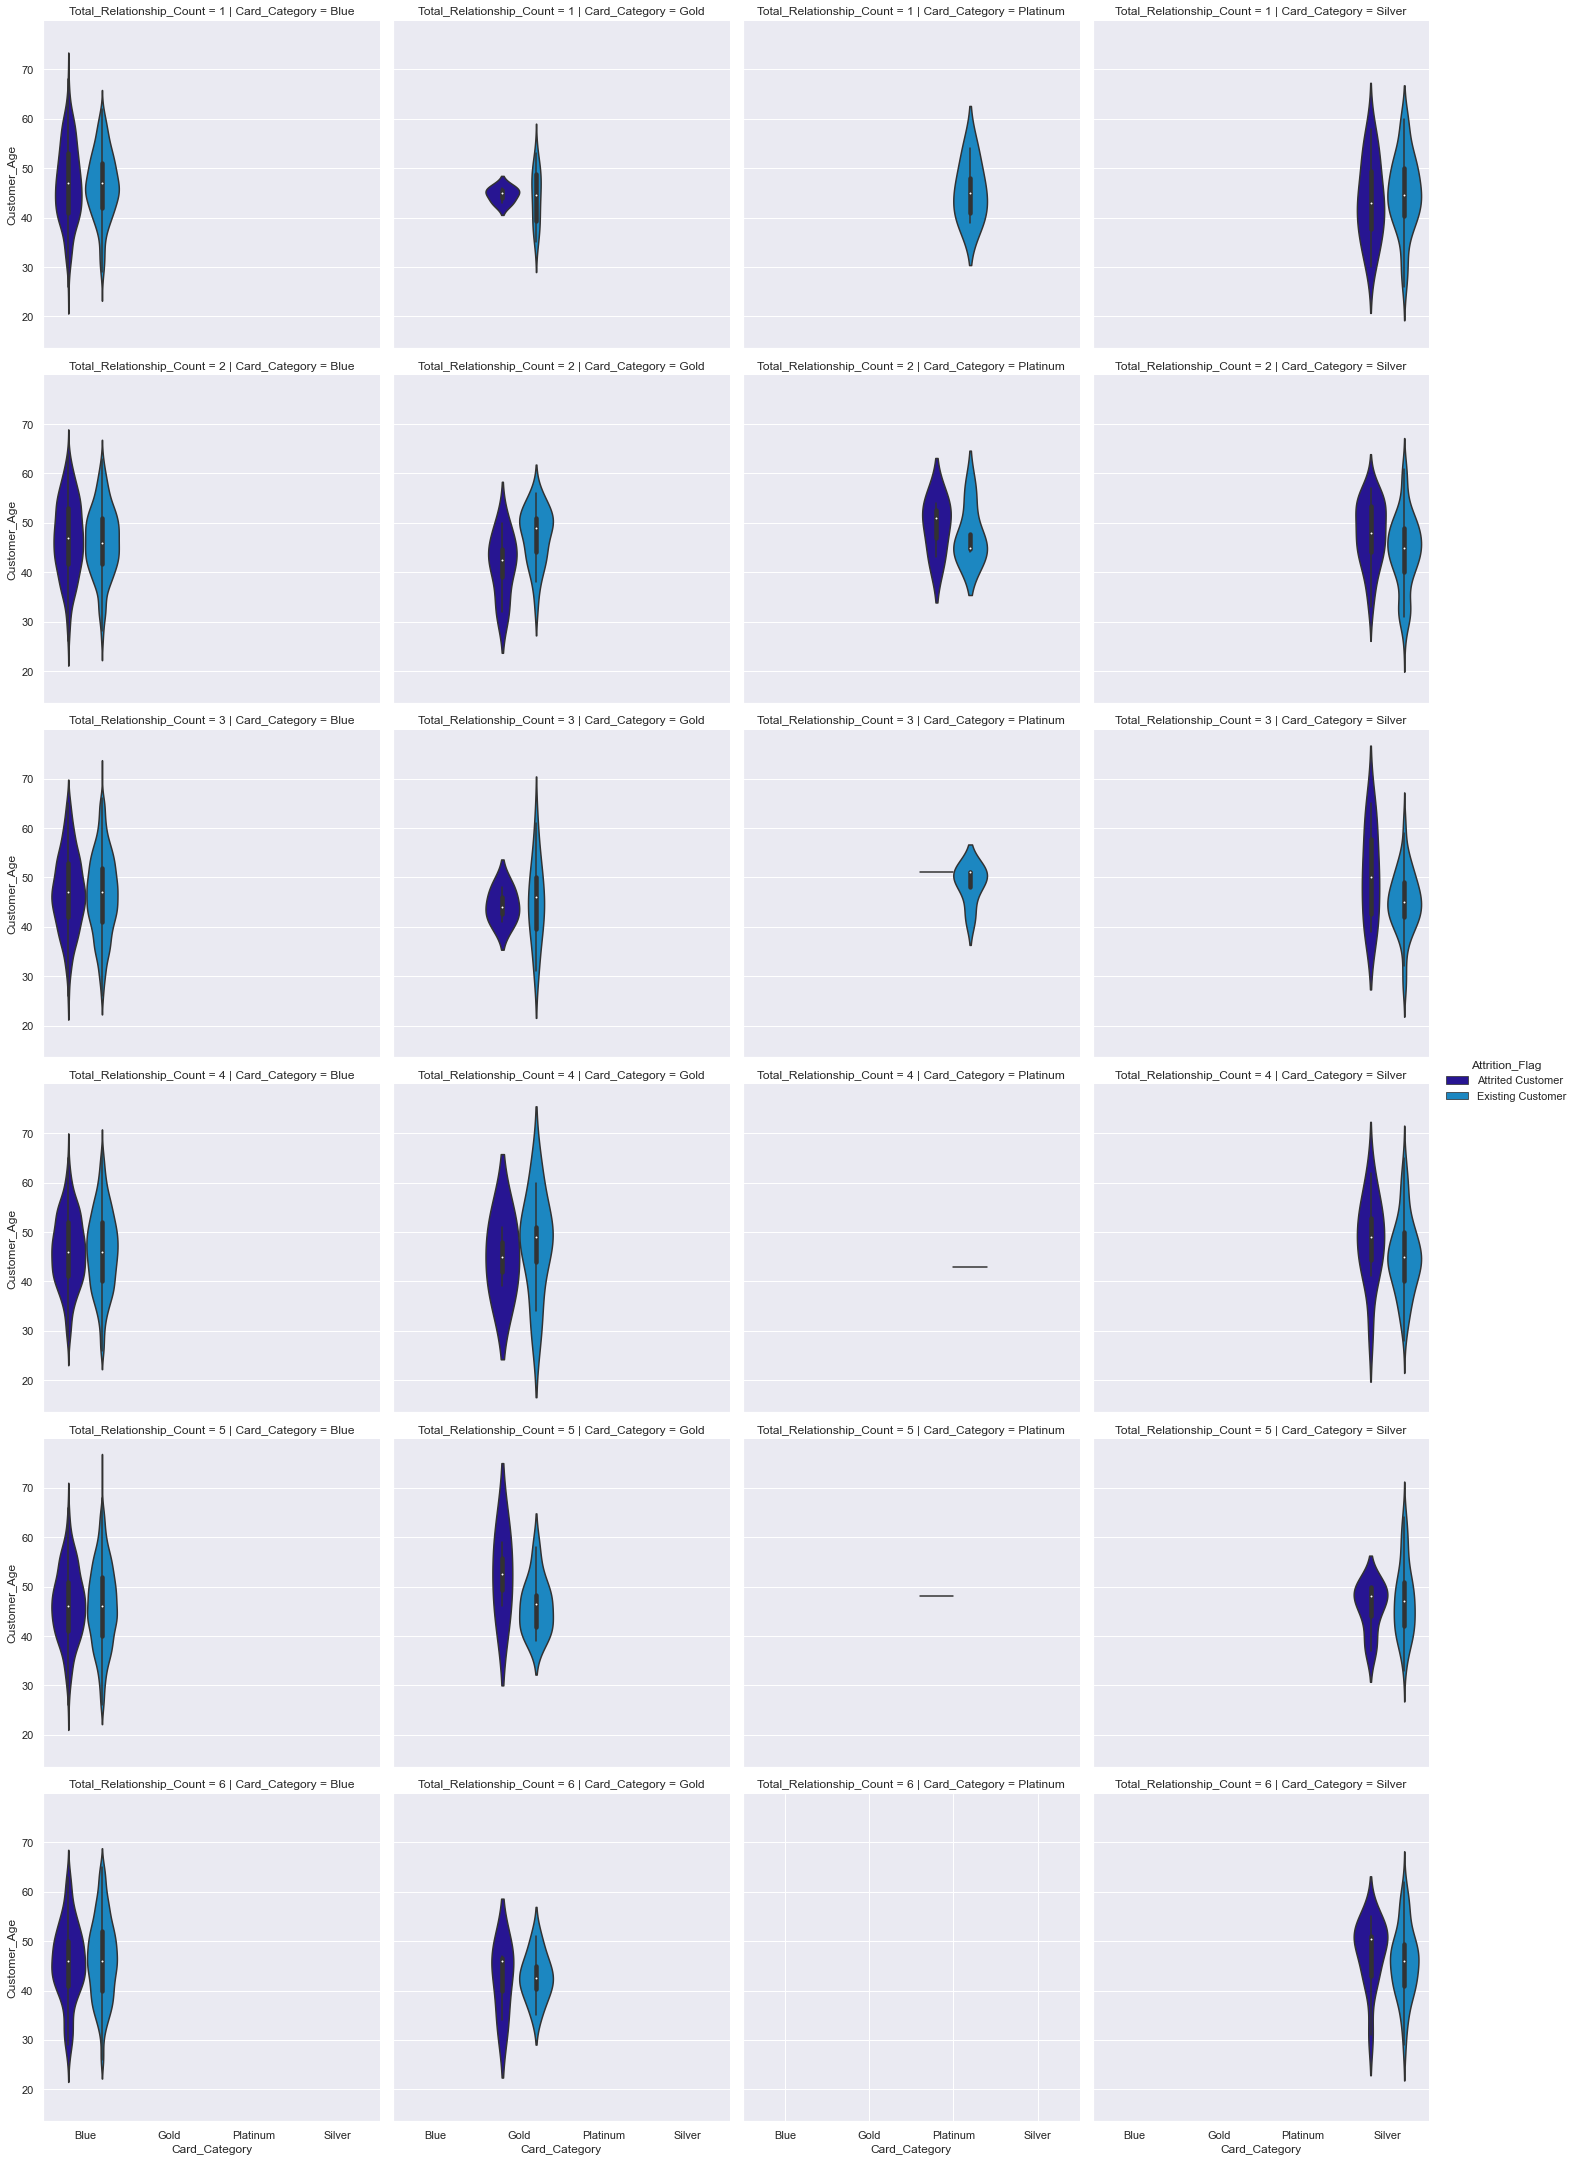

In [76]:


plt.figure(figsize=(40,40))
sns.catplot(x ='Card_Category', y = 'Customer_Age',row = 'Total_Relationship_Count',col = 'Card_Category',hue='Attrition_Flag',data = df, kind = 'violin' );
plt.show()

* There is no attrition for customer with platinum card and total product 1 and 3.
* There is significant customers with platinium card and total products above 3.
* attrited Customers with Gold card and total product 1 has age between 40-50 and whoe have 3 products have age range 35-55 yrs.


####  Plot of Months_Inactive_12_mon, Total_Revolving_Bal and Total_Relationship_Count with Attrition_Flag

<Figure size 2880x2880 with 0 Axes>

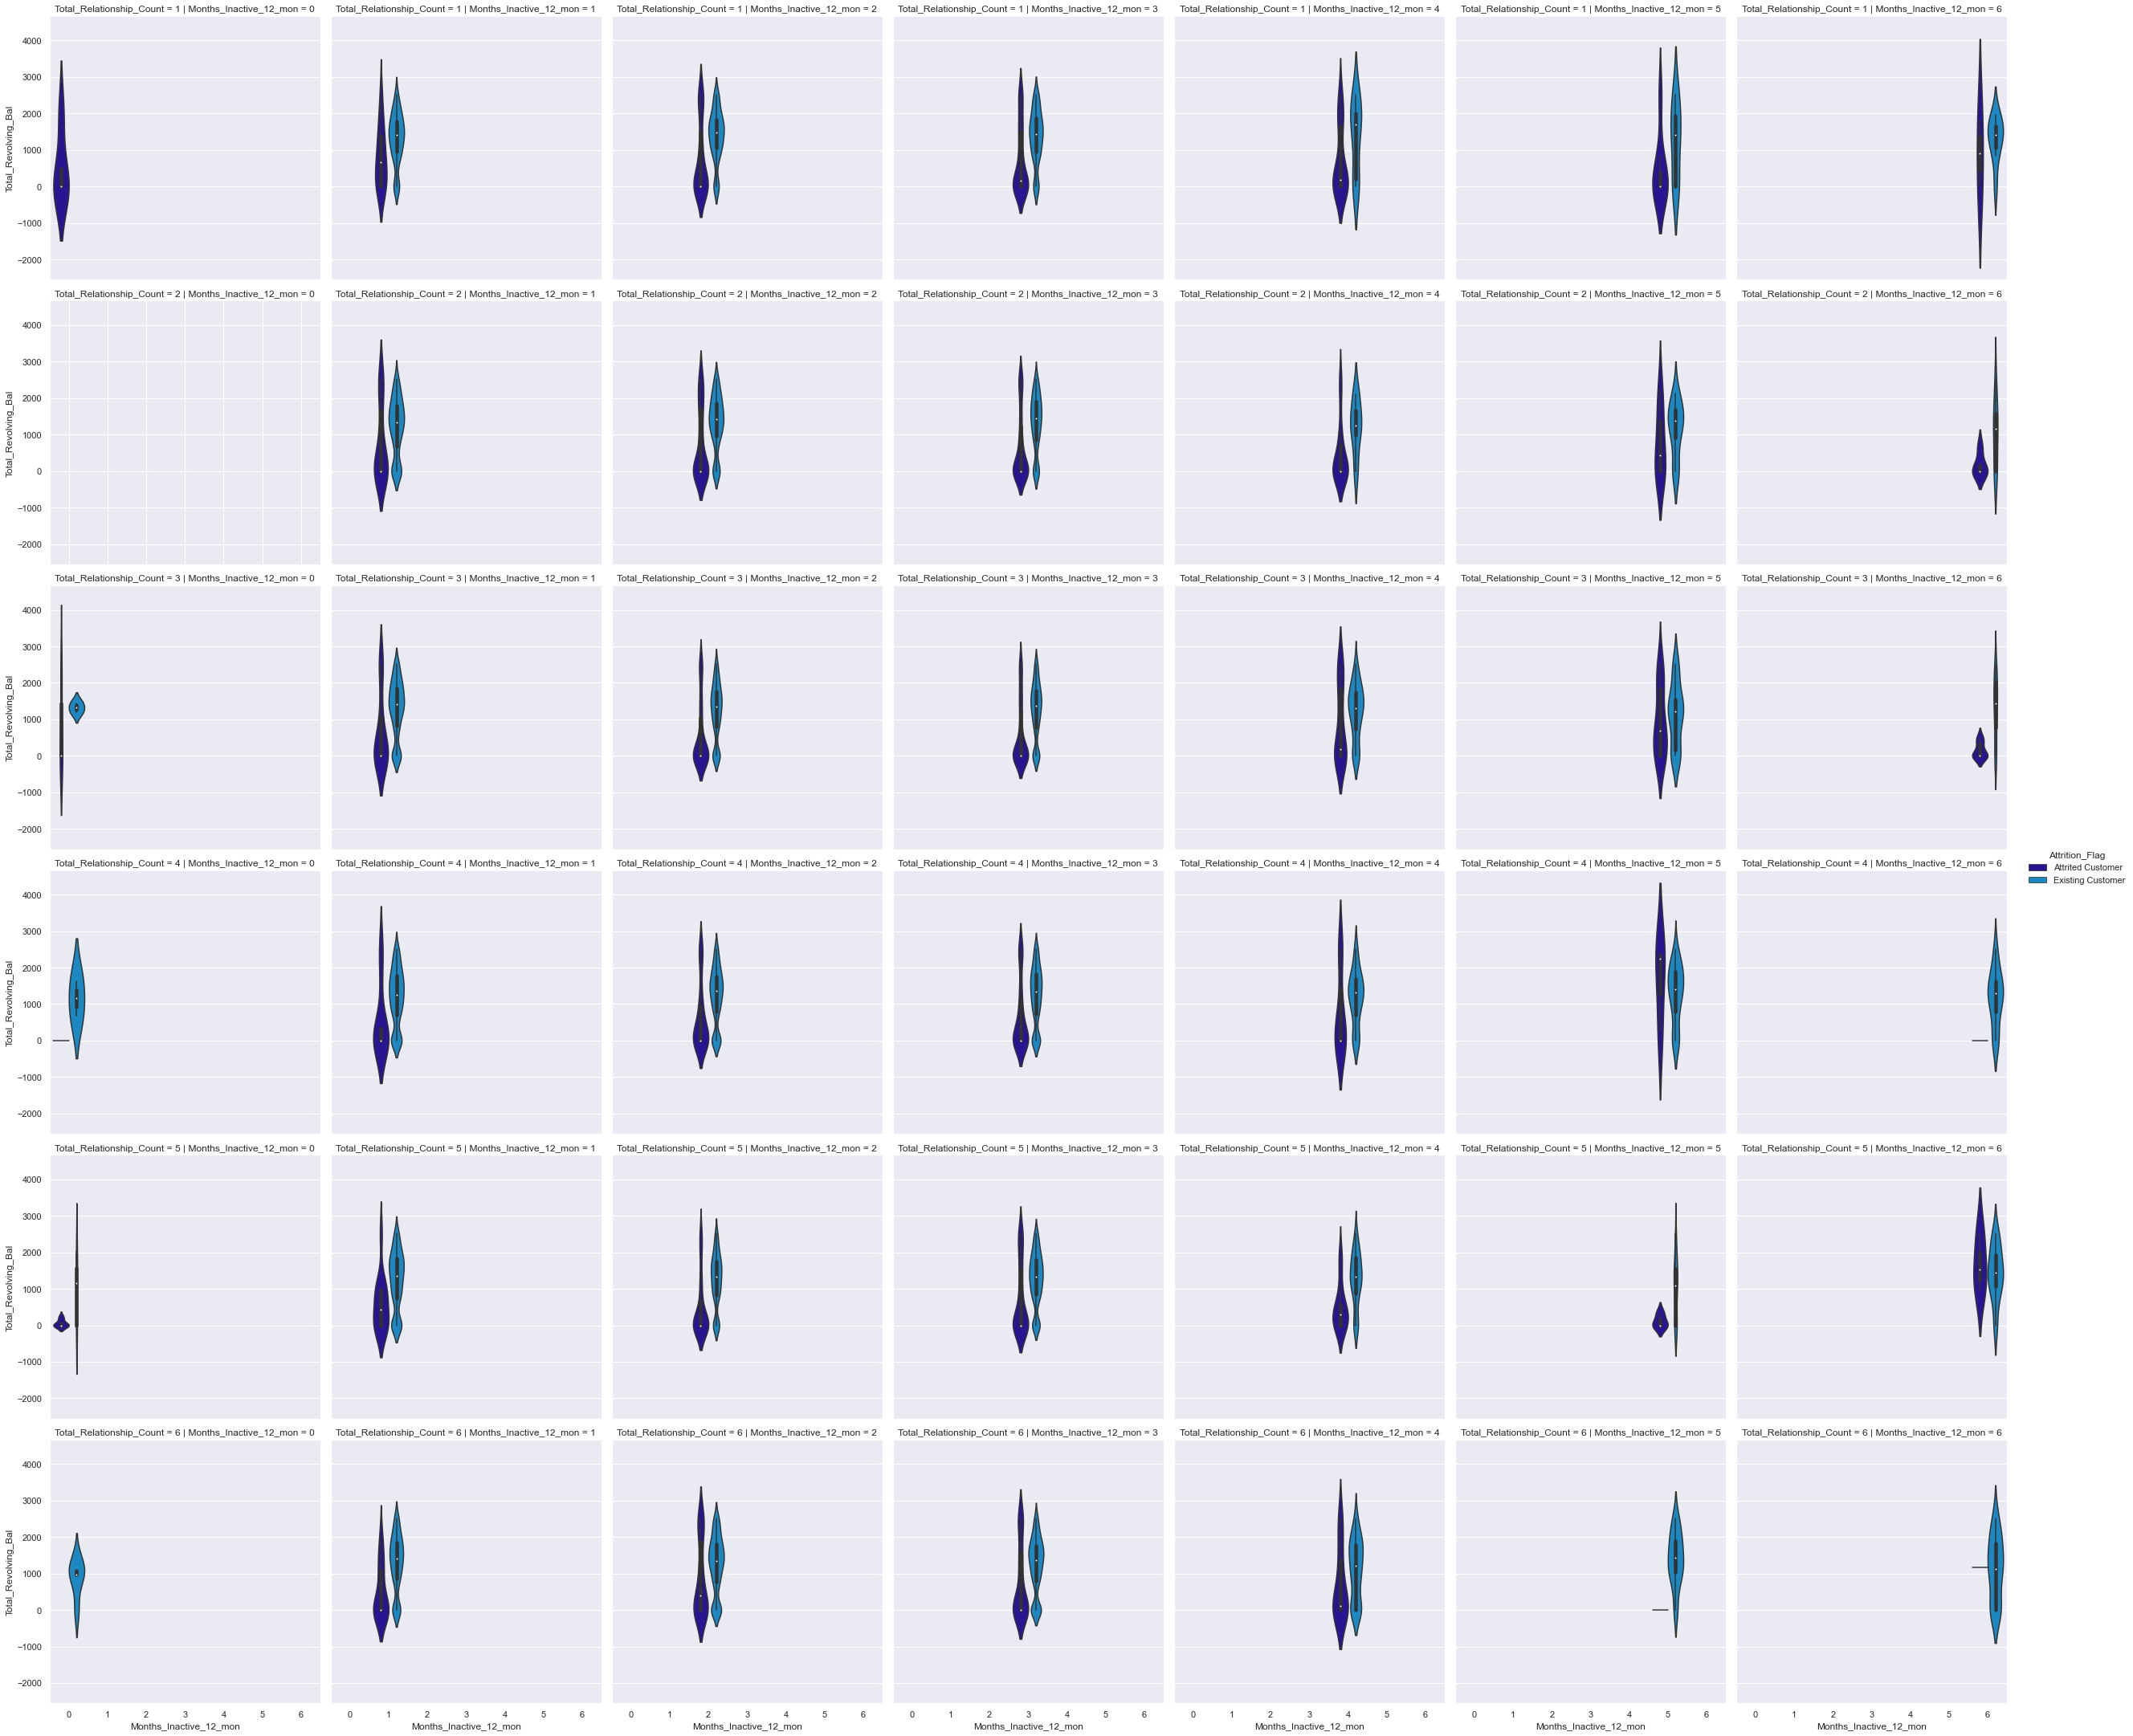

In [77]:


plt.figure(figsize=(40,40))
sns.catplot(x ='Months_Inactive_12_mon', y = 'Total_Revolving_Bal',row = 'Total_Relationship_Count',col = 'Months_Inactive_12_mon',hue='Attrition_Flag',data = df, kind = 'violin' );
plt.show()

* All of the customers with 1 product and 0 inactive month got attrited.
* Ther not attrition for customer with following combination:
1. 6 products and 0,5,6 month
2. 4 products and 0 inactive months

## 4. Insights based on EDA

1.  Only 16% customer attrited.
2.  30.9% customers are graduated followed by 19.9% customers have highest education  high school.
3.  almost 93% customers have blue card category.
4.  Data set is non-linear data set.
5.  `Credit_Limit` has linear relations to `Avg_Open_To_Buy` and we can drop `Avg_Open_To_Buy`
6.  `Months_on_book` and `Customer_Age` have a linear relationship so we can drop on of them. We will drop Months_on_book.

`Card_Category` :

7.  Customers with platinium card have maximum attrition count but most of the attrition is for customers with 3 products.
8.  Aattrited Customers with Gold card and total product 1 has age between 40-50 and who have 3 products and gold card have age range 35-55 yrs.

`Month_Inactive_12_mon`

9. All of the customers with 1 product and 0 inactive month got attrited.
10. There is  not attrition for customer with 6 and 4 products  and 0 inactive month.


11. Customer with higher contact count in last 12 month have higher attrition count. 100% customers with 6 no of contact have attrited.
12. attrition rate is highest if customer has 0 inactive months.
13. Customer attrition is higher for less relationship count(1, 2).
14. Customer with age 30-60 and Avg_Utilization_ratio less than .2 were attrited.
15. Customer with age 35-60 and total_trans_amt less than 4000 were attrited.
16. Customer with age 30-70 and total_revolving_bal less than 1000 were attrited.





## 5. Data Pre-processing

#### 5.1 Label Encoding: 

In [78]:
#### Dropping CLIENTNUM as it's just id and Months_on_book 
df.drop(columns=['Months_on_book','CLIENTNUM','Avg_Open_To_Buy'],inplace=True)


In [79]:
#label encoding of income_Category
income_Category = {'Less than $40K':1, '$40K - $60K':2, '$80K - $120K':3, '$60K - $80K':4, '$120K +':5}
df['Income_Category']=df['Income_Category'].map(income_Category)
df['Income_Category']



0        4
1        1
2        3
3        1
4        4
        ..
10122    2
10123    2
10124    1
10125    2
10126    1
Name: Income_Category, Length: 10127, dtype: category
Categories (5, int64): [5, 2, 4, 3, 1]

In [80]:
df['Income_Category'].value_counts(dropna=False)

1      3561
2      1790
3      1535
4      1402
NaN    1112
5       727
Name: Income_Category, dtype: int64

In [81]:
## label encoding of  attrition_fllag
'Attrited Customer', 'Existing Customer'
Attrition_Flag = {'Attrited Customer':1, 'Existing Customer':0}
df['Attrition_Flag']=df['Attrition_Flag'].map(Attrition_Flag)
df['Attrition_Flag']

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: category
Categories (2, int64): [1, 0]

In [82]:
df['Attrition_Flag'].value_counts(dropna=False)

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

#### Label Encoding of Gender, Education_Level,Marital_Status,Income_Category and Card_Category

In [83]:
le = LabelEncoder()

In [84]:
df['Gender']=le.fit_transform(df['Gender'])
df['Education_Level']=le.fit_transform(df['Education_Level'])
df['Marital_Status']=le.fit_transform(df['Marital_Status'])
df['Card_Category']=le.fit_transform(df['Card_Category'])

In [85]:
df['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [86]:
df['Education_Level'].value_counts()

2    3128
3    2013
4    1519
6    1487
0    1013
5     516
1     451
Name: Education_Level, dtype: int64

In [87]:
df['Marital_Status'].value_counts()

1    4687
3    3943
2     749
0     748
Name: Marital_Status, dtype: int64

In [88]:
df['Card_Category'].value_counts()

0    9436
3     555
1     116
2      20
Name: Card_Category, dtype: int64

#### 5.2 Split the data into train and test sets

In [89]:
X=df.drop(columns="Attrition_Flag")
Y=df['Attrition_Flag']

In [90]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 17) (3039, 17)


In [91]:
X.dtypes

Customer_Age                   int64
Gender                         int32
Dependent_count                int64
Education_Level                int32
Marital_Status                 int32
Income_Category             category
Card_Category                  int32
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

#### 5.3. Missing value Treatment

In [92]:
df.isnull().sum().sort_values(ascending=False).reset_index()


index     0
0            Income_Category  1112
1      Avg_Utilization_Ratio     0
2        Total_Ct_Chng_Q4_Q1     0
3               Customer_Age     0
4                     Gender     0
5            Dependent_count     0
6            Education_Level     0
7             Marital_Status     0
8              Card_Category     0
9   Total_Relationship_Count     0
10    Months_Inactive_12_mon     0
11     Contacts_Count_12_mon     0
12              Credit_Limit     0
13       Total_Revolving_Bal     0
14      Total_Amt_Chng_Q4_Q1     0
15           Total_Trans_Amt     0
16            Total_Trans_Ct     0
17            Attrition_Flag     0

In [93]:
df_null = df.isnull().sum().sort_values(ascending=False).reset_index()
df_null.columns = ['columns','missing_counts']
df_null=df_null[df_null['missing_counts']>0]
df_null['columns']


0    Income_Category
Name: columns, dtype: object

#### Treating Missing value of Income_Category

* We will use KNNImputer to impute missing values. 


In [94]:
imputer = KNNImputer( n_neighbors=5)

In [95]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [96]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct            

#### All of the missing values have been treated. 

#### 5.4 Outlier Treatment and Feature Engineering (scaling)

* The following columns have outliers: `Total_Trans_Ct`,`Total_Trans_Amt`,`Avg_Open_To_Buy`,`Credit_Limit`,`Customer_Age`
* Total_Trans_Ct,Total_Trans_Amt,Avg_Open_To_Buy ,Credit_Limit ,Customer_Age,Months_on_book can be log transformed as it's minimum value is non-zero number.
* For Rest of the columns, we can fix outlier and then can use RobustScalar.

####  Log transformation of  `Total_Trans_Ct`,`Total_Trans_Amt` ,`Credit_Limit` ,`Customer_Age`

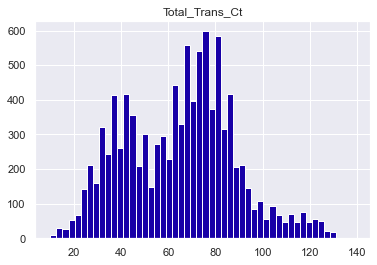

0


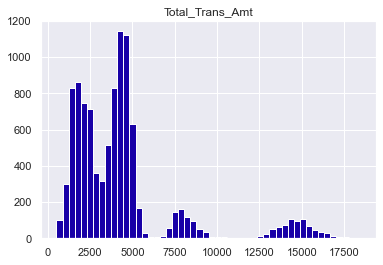

0


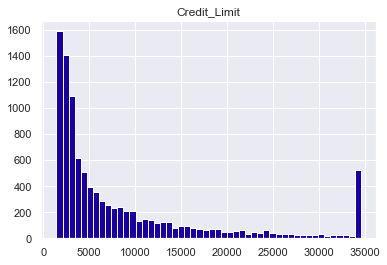

0


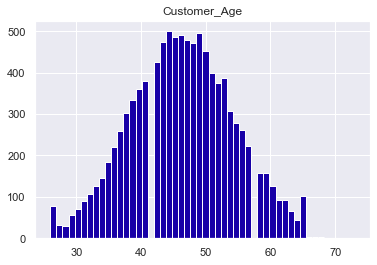

0


In [97]:
#histplot for Income, CCAvg and Mortgage before log transformation
cols_to_log = ['Total_Trans_Ct','Total_Trans_Amt','Credit_Limit','Customer_Age']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

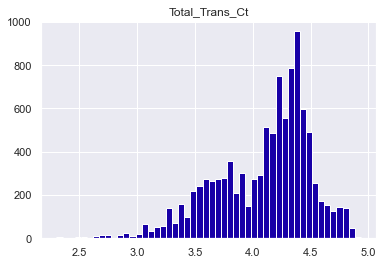

0


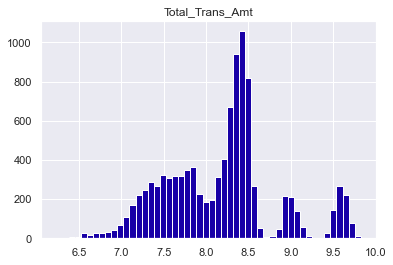

0


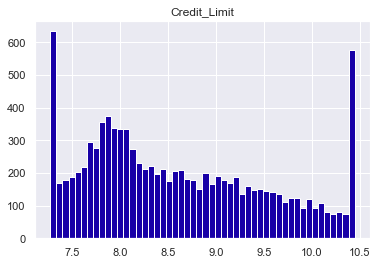

0


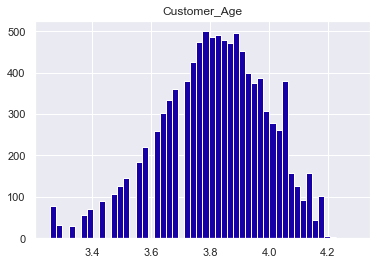

0


In [98]:
## Histplot after transformatyion

for colname in cols_to_log:
    plt.hist(np.log(df[colname]), bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))


In [99]:
## log transforation for train
for colname in cols_to_log:
    X_train[colname + '_log'] = np.log(X_train[colname])
X_train.drop(cols_to_log, axis=1, inplace=True)

In [100]:
## log transforation for test
for colname in cols_to_log:
    X_test[colname + '_log'] = np.log(X_test[colname])
X_test.drop(cols_to_log, axis=1, inplace=True)

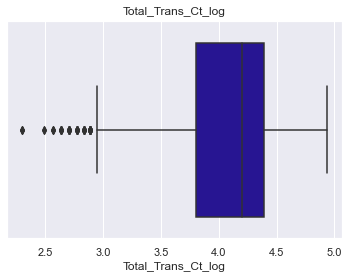

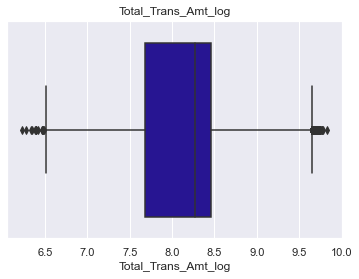

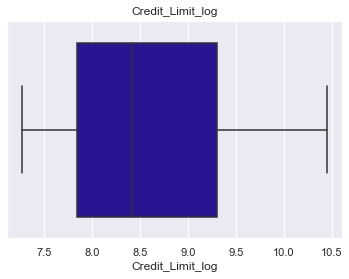

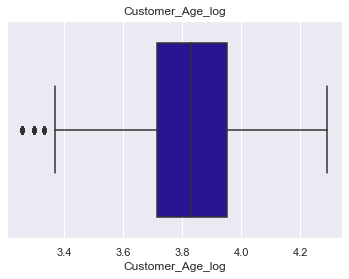

In [101]:
##verify the outliers
col_to_log = ['Total_Trans_Ct_log','Total_Trans_Amt_log','Credit_Limit_log','Customer_Age_log']

for col in col_to_log:
    sns.boxplot(data=X_train,x=col);
    
    plt.title(col)          
    plt.show()

####   Outlier treatment for Total_Ct_Chng_Q4_Q1-outliers,Total_Trans_Ct,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Credit_Limit,Contacts_Count_12_mon,Months_Inactive_12_mon,Months_on_book,Customer_Age

In [102]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

In [103]:
X_train.columns

Index(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Total_Trans_Ct_log', 'Total_Trans_Amt_log',
       'Credit_Limit_log', 'Customer_Age_log'],
      dtype='object')

In [104]:
def plot_box(df,col):
    ## verifying if all outliers are treated
    sns.boxplot(data=df,x=col);
    
    plt.title(col)          
    plt.show()

In [105]:
X_train.columns

Index(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Total_Trans_Ct_log', 'Total_Trans_Amt_log',
       'Credit_Limit_log', 'Customer_Age_log'],
      dtype='object')

In [106]:
cols_outlier = ['Total_Trans_Ct_log', 'Total_Trans_Amt_log',
       'Credit_Limit_log', 'Customer_Age_log',
       'Total_Ct_Chng_Q4_Q1',
       'Total_Amt_Chng_Q4_Q1', 'Contacts_Count_12_mon',
       'Months_Inactive_12_mon']

In [107]:
X_train.columns

Index(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Total_Trans_Ct_log', 'Total_Trans_Amt_log',
       'Credit_Limit_log', 'Customer_Age_log'],
      dtype='object')

In [108]:
X_test.columns

Index(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Total_Trans_Ct_log', 'Total_Trans_Amt_log',
       'Credit_Limit_log', 'Customer_Age_log'],
      dtype='object')

In [109]:

for c in cols_outlier:
    X_train = treat_outliers(X_train,c)
    X_test = treat_outliers(X_test,c)

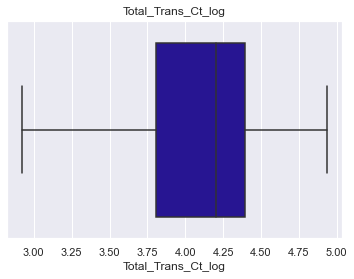

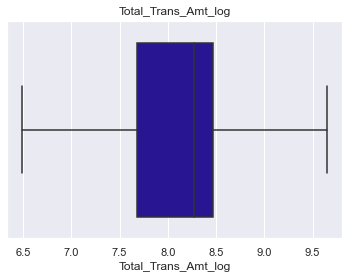

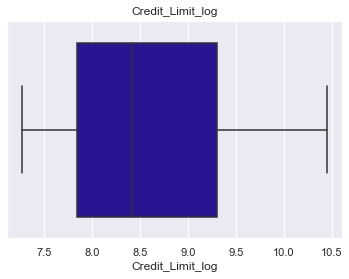

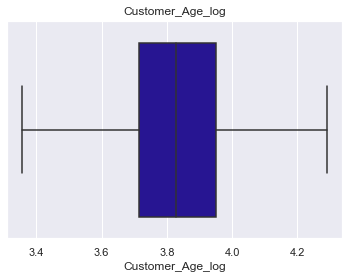

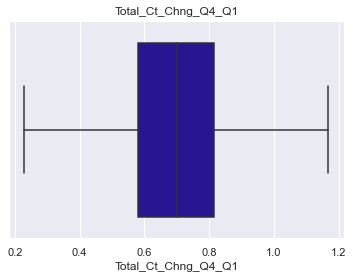

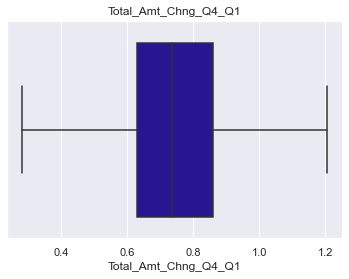

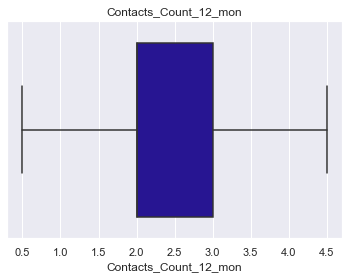

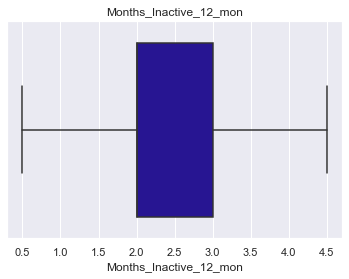

In [110]:
####verifying if outliers in train are treated
for col in cols_outlier:
    plot_box(X_train,col)

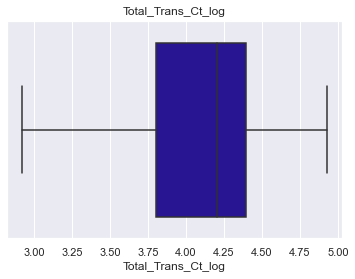

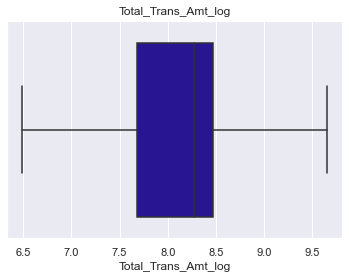

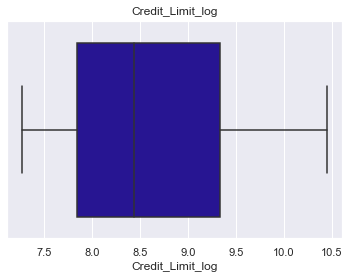

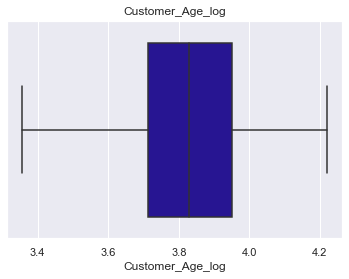

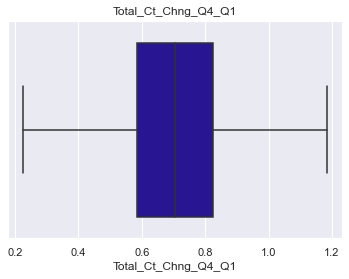

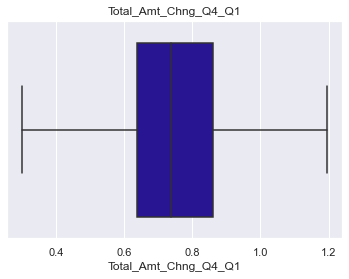

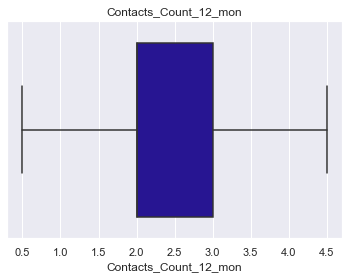

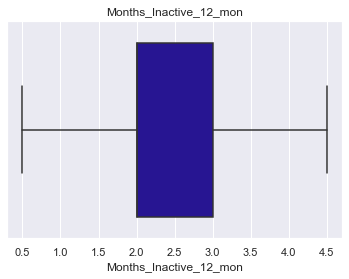

In [111]:
####verifying if outliers in test are treated
for col in cols_outlier:
    plot_box(X_test,col)

In [112]:
X_train.dtypes

Gender                      float64
Dependent_count             float64
Education_Level             float64
Marital_Status              float64
Income_Category             float64
Card_Category               float64
Total_Relationship_Count    float64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon       float64
Total_Revolving_Bal         float64
Total_Amt_Chng_Q4_Q1        float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Total_Trans_Ct_log          float64
Total_Trans_Amt_log         float64
Credit_Limit_log            float64
Customer_Age_log            float64
dtype: object

## Model Building

#### * Funtions to show different metrices and confusion matrix


In [113]:
def get_recall_score(model,flag=True,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [114]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [115]:
##  Function to calculate precision score
def get_f1_score(model,flag=True,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_f1score = metrics.f1_score(y_train,pred_train)
    test_f1score = metrics.f1_score(y_test,pred_test)
    b.append(train_f1score) # adding train precision to list
    b.append(test_f1score) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("f1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 score  on test set : ",metrics.f1_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [116]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [117]:
def make_confusion_matrix(model,y_actual,labels=[1, 0],X_test=X_test):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 6. Logistic REgression with sampling and regularization

### 6.1 Building Logistic Regression model

In [118]:
model = LogisticRegression()

In [119]:
#Fit the model on original data
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.8894373149062191


In [120]:
lg_acc = get_accuracy_score(model)
lg_recall = get_recall_score(model)
lg_precision = get_precision_score(model)
lg_f1score  = get_f1_score(model)


Accuracy on training set :  0.8919300225733634
Accuracy on test set :  0.8894373149062191
Recall on training set :  0.5013169446883231
Recall on test set :  0.4774590163934426
Precision on training set :  0.7425227568270482
Precision on test set :  0.7420382165605095
f1 score on training set :  0.5985324947589098
f1 score  on test set :  0.5810473815461346


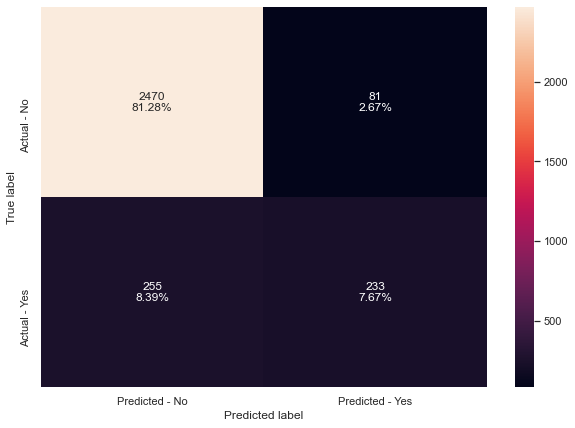

In [121]:
make_confusion_matrix(model,y_test)

* recall is very low.  We can try to up sample and down sample target variable as this is imbalanced data set.

### 6.2 Logistic regression improvement using unsampling and downsampling

#### Upsampling using SMOTE

In [122]:
y_train.value_counts()

0    5949
1    1139
Name: Attrition_Flag, dtype: int64

* Attrited customer class is minority class and we can try to upsample it.

In [123]:
print("Before UpSampling, counts of label '1': {} \t%s" %sum(y_train==1))
print("Before UpSampling, counts of label '0': {} \t%s" %sum(y_train==0))

sm = SMOTE(sampling_strategy = 1.0 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': {} 	1139
Before UpSampling, counts of label '0': {} 	5949
After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 5949 

After UpSampling, the shape of train_X: (11898, 17)
After UpSampling, the shape of train_y: (11898,) 



In [124]:
#Fit the model on upsampled data
model_up_lg = LogisticRegression()
model_up_lg.fit(X_train_res, y_train_res)
y_predict = model_up_lg.predict(X_test)
model_score = model_up_lg.score(X_test, y_test)
print(model_score)

0.7736097400460678


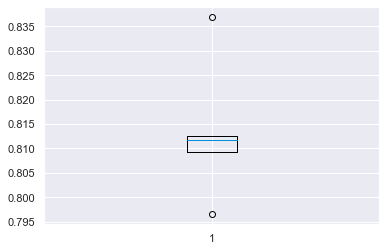

In [125]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=model_up_lg, X=X_train_res, y=y_train_res, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Recall for this model will vary from .77 to .83. Lets check it for test set.

In [126]:
lg_up_acc = get_accuracy_score(model_up_lg,X_train=X_train_res,y_train=y_train_res,X_test=X_test,y_test=y_test)
lg_up_recall = get_recall_score(model_up_lg)
lg_up_precision = get_precision_score(model_up_lg)
lg_up_f1score  = get_f1_score(model_up_lg)

Accuracy on training set :  0.7856782652546647
Accuracy on test set :  0.7736097400460678
Recall on training set :  0.746268656716418
Recall on test set :  0.7336065573770492
Precision on training set :  0.41023166023166024
Precision on test set :  0.39082969432314413
f1 score on training set :  0.5294300840859545
f1 score  on test set :  0.50997150997151


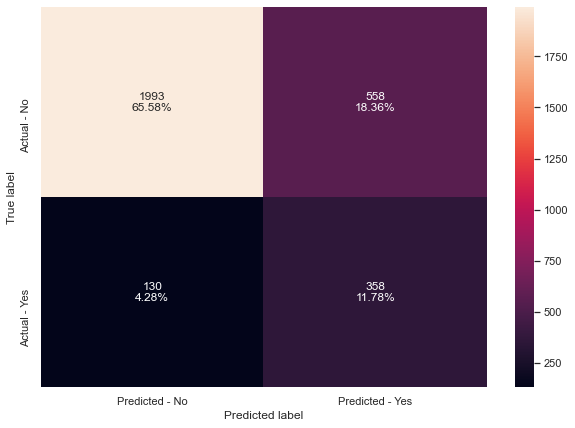

In [127]:
make_confusion_matrix(model_up_lg,y_test)

* Recall value has been improved to .73 but accuracy and precision are still very low. Although we are focusing on recall but f1 should also be good.

#### Downsampling large class (  Label :0)

In [128]:
Attrition_cust_indices = df[df["Attrition_Flag"] == 1].index #the record numbers of attrition customer
Attrition_cust_len = len(df[df['Attrition_Flag'] == 1])       # how many attrition customer
print(Attrition_cust_len)

existing_cust_indices = df[df["Attrition_Flag"] == 0].index   # the record numbers of existing case
existing_cust_len = len(df[df['Attrition_Flag'] == 0])            # how many existing customer
print(existing_cust_len)


1627
8500


In [129]:
###Randomly selecting records for existing customer class for down  sampling
ext_cut_random_indices = np.random.choice( existing_cust_indices, existing_cust_len-6500, replace=False)    #Randomly pick up 200 non-diab indices
print(len(ext_cut_random_indices))

2000


In [130]:
#Concating the indices
down_sample_indices = np.concatenate([Attrition_cust_indices,ext_cut_random_indices])  # combine the existing customer with attrired customers

In [131]:
down_sample_indices.shape

(3627,)

In [132]:
df_down_sample = df.loc[down_sample_indices]  # Extract all those records for diab and non-diab to create new set
df_down_sample.shape
df_down_sample.groupby(["Attrition_Flag"]).count()  # look at the class distribution after downsample

Customer_Age  Gender  Dependent_count  Education_Level  \
Attrition_Flag                                                           
1                       1627    1627             1627             1627   
0                       2000    2000             2000             2000   

                Marital_Status  Income_Category  Card_Category  \
Attrition_Flag                                                   
1                         1627             1440           1627   
0                         2000             1769           2000   

                Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                     
1                                   1627                    1627   
0                                   2000                    2000   

                Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                             
1                                1627          1627                 1627   
0                                2000          2000                 2000   

                Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
Attrition_Flag                                                          
1                               1627             1627            1627   
0                               2000             2000            2000   

                Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                              
1                              1627                   1627  
0                              2000                   2000

In [133]:
X_downSample = df_down_sample.drop(columns =("Attrition_Flag"))
y_downsample = df_down_sample["Attrition_Flag"]


In [134]:
X_downSample['Gender'].value_counts()

0    1995
1    1632
Name: Gender, dtype: int64

In [135]:
print(X_downSample.isna().sum())

Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category             418
Card_Category                 0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64


In [136]:
#Fit and transform the down sample data
X_downSample=pd.DataFrame(imputer.fit_transform(X_downSample),columns=X_downSample.columns)
print(X_downSample.isna().sum())


Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [137]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_downSample, y_downsample, test_size=test_size, random_state=seed)
type(X_train_ds)

pandas.core.frame.DataFrame

In [138]:
# Fit the model on 30%
model_lg_ds = LogisticRegression()
model_lg_ds.fit(X_train_ds, y_train_ds)
y_predict = model_lg_ds.predict(X_test_ds)
model_score = model_lg_ds.score(X_test_ds, y_test_ds)


In [139]:
lg_up_acc = get_accuracy_score(model_lg_ds,X_train=X_train_ds,y_train=y_train_ds,X_test=X_test_ds,y_test=y_test_ds)
lg_up_recall = get_recall_score(model_lg_ds,X_train=X_train_ds,y_train=y_train_ds,X_test=X_test_ds,y_test=y_test_ds)
lg_up_precision = get_precision_score(model_lg_ds,X_train=X_train_ds,y_train=y_train_ds,X_test=X_test_ds,y_test=y_test_ds)
lg_up_f1score  = get_f1_score(model_lg_ds,X_train=X_train_ds,y_train=y_train_ds,X_test=X_test_ds,y_test=y_test_ds)

Accuracy on training set :  0.8120567375886525
Accuracy on test set :  0.8154269972451791
Recall on training set :  0.7803571428571429
Recall on test set :  0.7928994082840237
Precision on training set :  0.7909502262443439
Precision on test set :  0.8072289156626506
f1 score on training set :  0.7856179775280898
f1 score  on test set :  0.8000000000000002


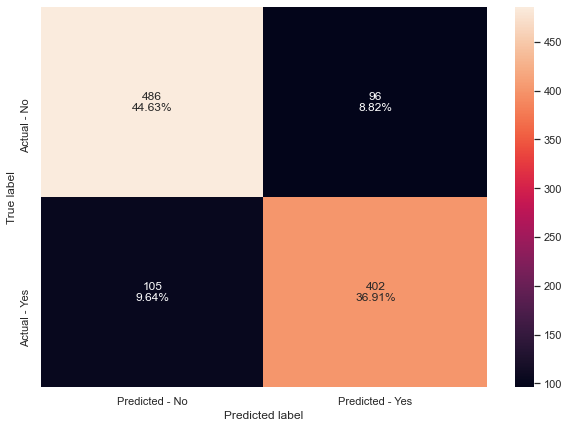

In [140]:
make_confusion_matrix(model_lg_ds,y_test_ds,X_test=X_test_ds)

* Recall value has been improved to .80 and accuracy and f1 scores are also good.but we can try to further improve it.

In [141]:
X_train.shape

(7088, 17)

In [142]:
y_train.shape

(7088,)

### 6.3 Regularizing Logistic Regression model

### Upsampled model

In [143]:
# Choose the type of classifier. 

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj_hype = GridSearchCV(model_up_lg, parameters, scoring='recall')
grid_obj_hype = grid_obj_hype.fit(X_train_res, y_train_res)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj_hype.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_res, y_train_res)
model_score = lr_estimator.score(X_test, y_test)
print(model_score)

0.7696610727212899


In [144]:
lg_up_acc = get_accuracy_score(lr_estimator,X_train=X_train_res,y_train=y_train_res,X_test=X_test,y_test=y_test)
lg_up_recall = get_recall_score(lr_estimator,X_train=X_train_res,y_train=y_train_res,X_test=X_test,y_test=y_test)
lg_up_precision = get_precision_score(lr_estimator,X_train=X_train_res,y_train=y_train_res,X_test=X_test,y_test=y_test)
lg_up_f1score  = get_f1_score(lr_estimator,X_train=X_train_res,y_train=y_train_res,X_test=X_test,y_test=y_test)

Accuracy on training set :  0.7869389813414019
Accuracy on test set :  0.7696610727212899
Recall on training set :  0.7860144562111279
Recall on test set :  0.7459016393442623
Precision on training set :  0.787470528797575
Precision on test set :  0.3872340425531915
f1 score on training set :  0.7867418187936402
f1 score  on test set :  0.5098039215686274


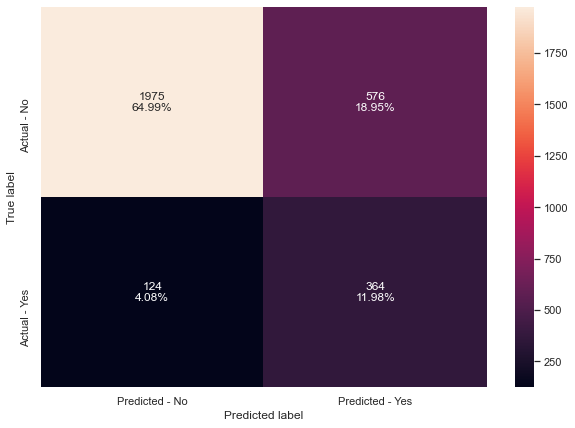

In [145]:
make_confusion_matrix(lr_estimator,y_test,X_test=X_test)

* Although recall is good but f1 score can't generalized.

#### Downsampling Logistic regression 

In [146]:
# Choose the type of classifier. 

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj_ds = GridSearchCV(model_lg_ds, parameters, scoring='recall')
grid_obj_ds = grid_obj_ds.fit(X_train_ds, y_train_ds)

# Set the clf to the best combination of parameters
lr_estimator_ds = grid_obj_ds.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator_ds.fit(X_train_ds, y_train_ds)
model_score = lr_estimator_ds.score(X_test_ds, y_test_ds)
print(model_score)

0.8163452708907254


In [147]:
lg_up_acc = get_accuracy_score(lr_estimator_ds,X_train=X_train_ds,y_train=y_train_ds,X_test=X_test_ds,y_test=y_test_ds)
lg_up_recall = get_recall_score(lr_estimator_ds,X_train=X_train_ds,y_train=y_train_ds,X_test=X_test_ds,y_test=y_test_ds)
lg_up_precision = get_precision_score(lr_estimator_ds,X_train=X_train_ds,y_train=y_train_ds,X_test=X_test_ds,y_test=y_test_ds)
lg_up_f1score  = get_f1_score(lr_estimator_ds,X_train=X_train_ds,y_train=y_train_ds,X_test=X_test_ds,y_test=y_test_ds)

Accuracy on training set :  0.8120567375886525
Accuracy on test set :  0.8163452708907254
Recall on training set :  0.7803571428571429
Recall on test set :  0.7928994082840237
Precision on training set :  0.7909502262443439
Precision on test set :  0.8088531187122736
f1 score on training set :  0.7856179775280898
f1 score  on test set :  0.800796812749004


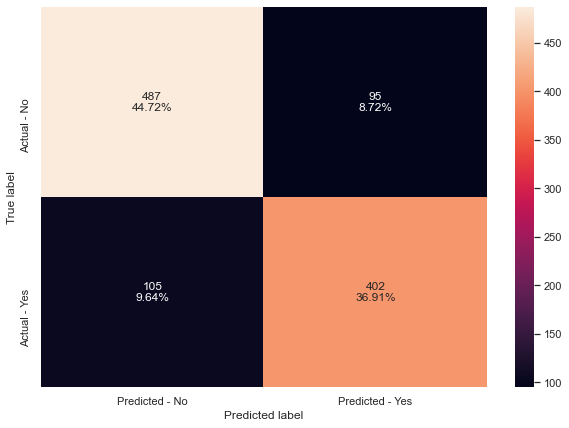

In [148]:
make_confusion_matrix(lr_estimator_ds,y_test_ds,X_test=X_test_ds)

* Recall is .79 and accuracy is .81 but we can try to improve it further with ensemble methods.

## 7.  Model building - Bagging and Boosting

### 7.1 Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [149]:
y_train.value_counts()

0    5949
1    1139
Name: Attrition_Flag, dtype: int64

In [150]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.2,1:0.8},random_state=1)

In [151]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

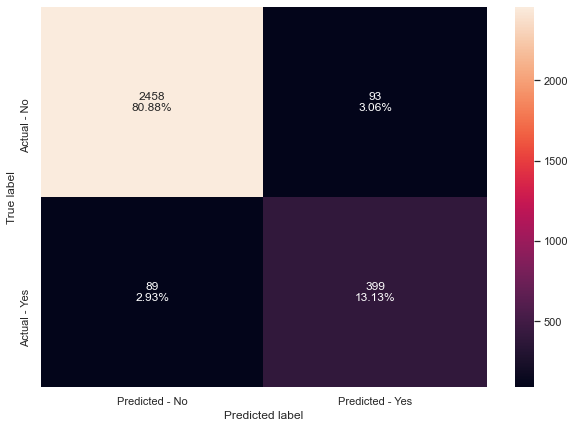

In [152]:
make_confusion_matrix(dtree,y_test)

**Confusion Matrix -**

* Cutomer Attrited and the model predicted it correctly that is customer will attrite :  True Positive (observed=1,predicted=1)

* Customer didn't attrite and the model predicted customer will attrite : False Positive (observed=0,predicted=1)

* Customer didn't attrite and the model predicted customer will not attrite : True Negative (observed=0,predicted=0)

* Customer Attrited and the model predicted that customer won't attrite : False Negative (observed=1,predicted=0)

In [153]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)
dtree_f1score  = get_f1_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9401118789075353
Recall on training set :  1.0
Recall on test set :  0.8176229508196722
Precision on training set :  1.0
Precision on test set :  0.8109756097560976
f1 score on training set :  1.0
f1 score  on test set :  0.8142857142857143


* Decision tree is overfitting to training data so even though acuracy, recall and precision is good,we can not generatizeworking well on the training.

### 7.2 Bagging Classifier

In [154]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [155]:
bagging.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

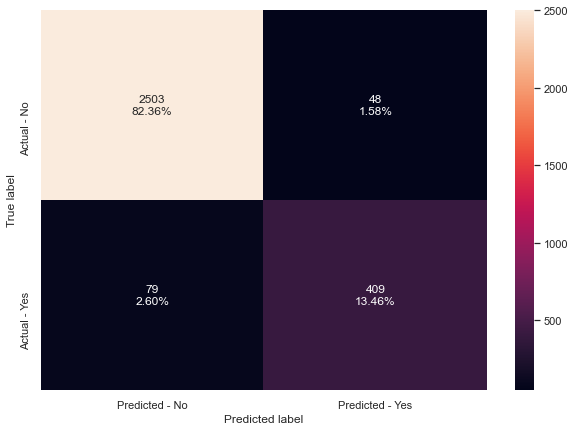

In [156]:
make_confusion_matrix(bagging,y_test)

In [157]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)
bagging_f1score  = get_f1_score(bagging)

Accuracy on training set :  0.9966139954853274
Accuracy on test set :  0.9582099374794341
Recall on training set :  0.9833187006145742
Recall on test set :  0.8381147540983607
Precision on training set :  0.9955555555555555
Precision on test set :  0.8949671772428884
f1 score on training set :  0.989399293286219
f1 score  on test set :  0.8656084656084656


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

**Bagging Classifier with weighted decision tree**

In [158]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.2,1:0.8},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        random_state=1),
                  random_state=1)

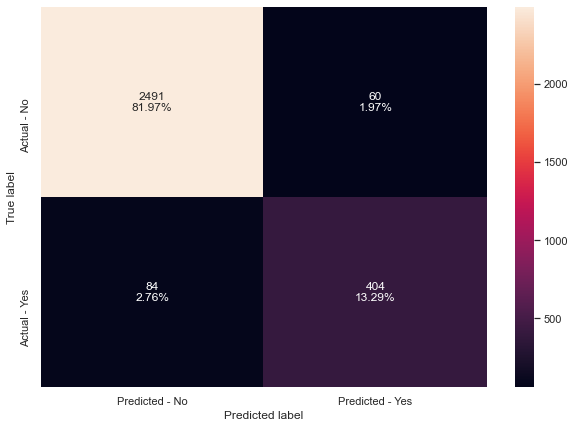

In [159]:
make_confusion_matrix(bagging_wt,y_test)

In [160]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)
wt_bagging_f1score  = get_f1_score(bagging_wt)

Accuracy on training set :  0.9964729119638827
Accuracy on test set :  0.9526159921026653
Recall on training set :  0.9815627743634767
Recall on test set :  0.8278688524590164
Precision on training set :  0.9964349376114082
Precision on test set :  0.8706896551724138
f1 score on training set :  0.9889429455992923
f1 score  on test set :  0.8487394957983194


* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction.But it is still a bit overfitting to training data. and difference between train and test result is significant.

### 7.3 Random Forest Classifier

In [161]:
rf = RandomForestClassifier(random_state=1,)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

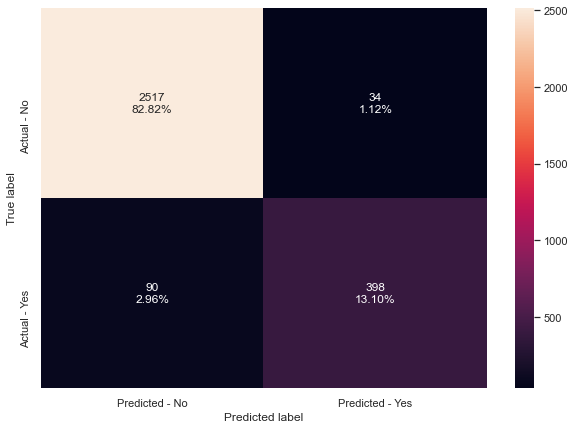

In [162]:
make_confusion_matrix(rf,y_test)

In [163]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)
rf_f1score  = get_f1_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9591971043106285
Recall on training set :  1.0
Recall on test set :  0.8155737704918032
Precision on training set :  1.0
Precision on test set :  0.9212962962962963
f1 score on training set :  1.0
f1 score  on test set :  0.8652173913043477


* Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall. it is also overfitting to train data.

**Random forest with class weights**

In [164]:
rf_wt = RandomForestClassifier(class_weight={0:0.20,1:0.80}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

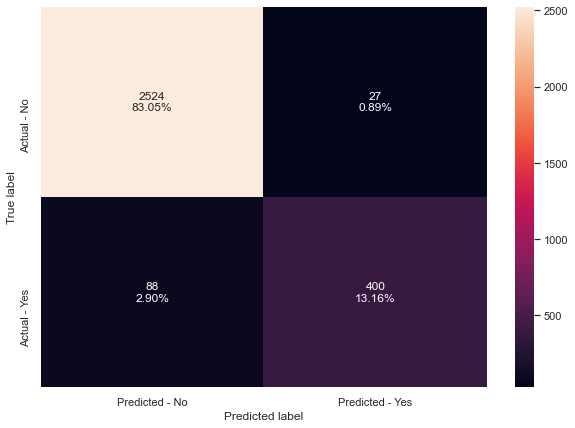

In [165]:
make_confusion_matrix(rf_wt,y_test)

In [166]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)
wt_rf_f1score  = get_f1_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9621586048042119
Recall on training set :  1.0
Recall on test set :  0.819672131147541
Precision on training set :  1.0
Precision on test set :  0.936768149882904
f1 score on training set :  1.0
f1 score  on test set :  0.8743169398907104


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### 7.4 Ada Boost Model

In [167]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

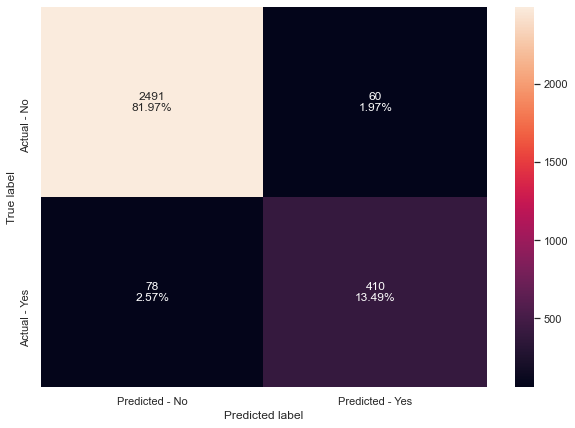

In [168]:
make_confusion_matrix(abc,y_test)

In [169]:
ada_acc = get_accuracy_score(abc)
ada_recall = get_recall_score(abc)
ada_precision = get_precision_score(abc)
ada_f1score  = get_f1_score(abc)

Accuracy on training set :  0.9578160270880361
Accuracy on test set :  0.9545903257650543
Recall on training set :  0.839332748024583
Recall on test set :  0.8401639344262295
Precision on training set :  0.8917910447761194
Precision on test set :  0.8723404255319149
f1 score on training set :  0.8647670737222977
f1 score  on test set :  0.8559498956158664


* Recall value (.83) is good and also other scores are also looking good.

### 7.5 Gradient Boosting Classifier

In [170]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

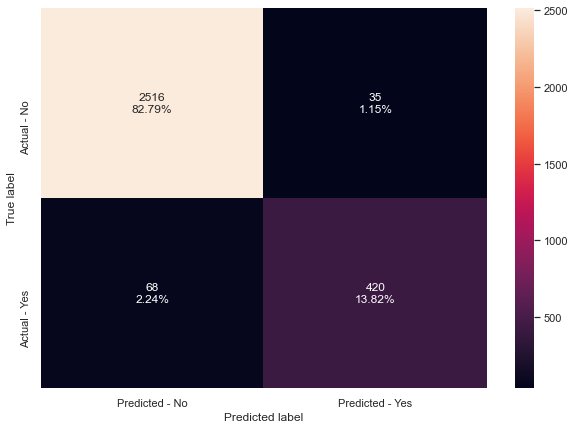

In [171]:
make_confusion_matrix(gbc,y_test)

In [172]:
gbc_acc = get_accuracy_score(gbc)
gbc_recall = get_recall_score(gbc)
gbc_precision = get_precision_score(gbc)
gbc_f1score  = get_f1_score(gbc)

Accuracy on training set :  0.9758747178329571
Accuracy on test set :  0.9661072721289898
Recall on training set :  0.8911325724319579
Recall on test set :  0.860655737704918
Precision on training set :  0.955743879472693
Precision on test set :  0.9230769230769231
f1 score on training set :  0.9223080417991821
f1 score  on test set :  0.8907741251325556


* Scores are looking good and even improved over last model.

### 7.6 XGBoost Classifier

In [173]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[11:21:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

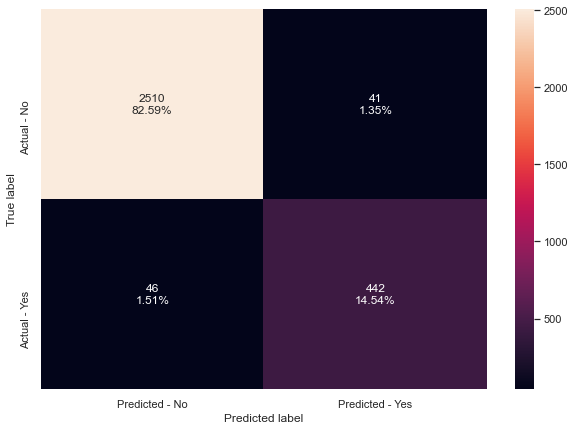

In [174]:
make_confusion_matrix(xgb,y_test)

In [175]:
xgb_acc = get_accuracy_score(xgb)
xgb_recall = get_recall_score(xgb)
xgb_precision = get_precision_score(xgb)
xgb_f1score  = get_f1_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9713721618953604
Recall on training set :  1.0
Recall on test set :  0.9057377049180327
Precision on training set :  1.0
Precision on test set :  0.9151138716356108
f1 score on training set :  1.0
f1 score  on test set :  0.9104016477857878


* This model is overfitting to training data and can't be generalized.

### Comparing all the models - Model performance evaluation

In [176]:
# defining list of models
models = [dtree,bagging,bagging_wt,rf,rf_wt,abc,gbc,xgb]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train=[]
f1_score_test=[]

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    # f1 score
    m = get_f1_score(model,False)
    f1_score_train.append(m[0])
    f1_score_test.append(m[1])

In [177]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Ada Boosting',
                                          'Gredient Boosting','XGB'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_f1score': f1_score_train,
                                          'Test_f1score': f1_score_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0                Decision Tree        1.000000       0.940112      1.000000   
1           Bagging Classifier        0.996614       0.958210      0.983319   
2  Weighted Bagging Classifier        0.996473       0.952616      0.981563   
3                Random Forest        1.000000       0.959197      1.000000   
4       Weighted Random Forest        1.000000       0.962159      1.000000   
5                 Ada Boosting        0.957816       0.954590      0.839333   
6            Gredient Boosting        0.975875       0.966107      0.891133   
7                          XGB        1.000000       0.971372      1.000000   

   Test_Recall  Train_Precision  Test_Precision  Train_f1score  Test_f1score  
0     0.817623         1.000000        0.810976       1.000000      0.814286  
1     0.838115         0.995556        0.894967       0.989399      0.865608  
2     0.827869         0.996435        0.870690       0.988943      0.848739  
3     0.815574         1.000000        0.921296       1.000000      0.865217  
4     0.819672         1.000000        0.936768       1.000000      0.874317  
5     0.840164         0.891791        0.872340       0.864767      0.855950  
6     0.860656         0.955744        0.923077       0.922308      0.890774  
7     0.905738         1.000000        0.915114       1.000000      0.910402

* Best 3 models are Gredient Boosting, Ada Boosting and bagging classifier

## 8.  Tuning Models -  Using GridSearch with pipeline

### 8.1 Tuning Bagging Classifier

In [178]:
###checking the parameter
bagging.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [179]:

cl1=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
cl2=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
cl3=DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=1)


In [180]:
cl1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [181]:
# grid search for bagging classifier
param_grid = {
               'bagging__base_estimator':[cl1,cl2,cl3], 
              'bagging__n_estimators':[5,7,10,15,20],
              'bagging__max_features': [0.7,0.8,0.9,1.0]
              #'bagging__max_samples':[5,10,15,50]
             }



In [182]:
pipe_bagging = Pipeline([('scl', StandardScaler()), ('bagging', bagging)]) 


In [183]:
pipe_bagging.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scl', 'bagging', 'scl__copy', 'scl__with_mean', 'scl__with_std', 'bagging__base_estimator', 'bagging__bootstrap', 'bagging__bootstrap_features', 'bagging__max_features', 'bagging__max_samples', 'bagging__n_estimators', 'bagging__n_jobs', 'bagging__oob_score', 'bagging__random_state', 'bagging__verbose', 'bagging__warm_start'])

In [184]:
%%time
scorer_recall = metrics.make_scorer(metrics.recall_score)
#scorer_precision = metrics.make_scorer(metrics.precision_score)


grid_pipe = GridSearchCV(estimator= pipe_bagging , param_grid = param_grid, cv = 10,scoring=scorer_recall) 

grid_pipe.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_pipe.best_score_)) 
print(" Best parameters: ", grid_pipe.best_params_) 
print(" Test set score: {:.2f}". format( grid_pipe.score( X_test, y_test)))


 Best cross-validation accuracy: 0.80
 Best parameters:  {'bagging__base_estimator': DecisionTreeClassifier(max_depth=5, random_state=1), 'bagging__max_features': 1.0, 'bagging__n_estimators': 15}
 Test set score: 0.83
Wall time: 1min 3s


In [185]:
bagging_tunned = grid_pipe.best_estimator_
bagging_tunned.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('bagging',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                         random_state=1),
                                   n_estimators=15, random_state=1))])

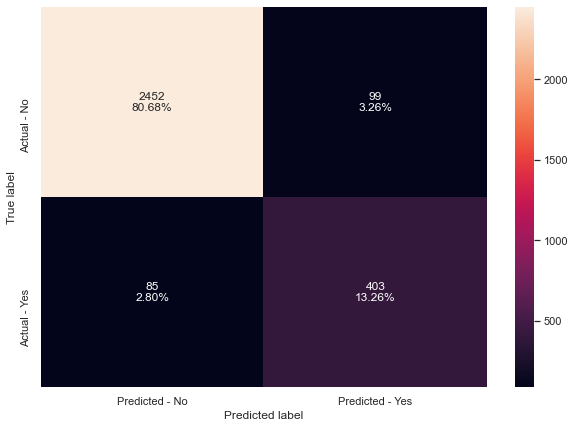

In [186]:
make_confusion_matrix(bagging_tunned,y_test)

In [187]:
tuned_bagging_acc= get_accuracy_score(bagging_tunned)
tuned_bagging_recall = get_recall_score(bagging_tunned)
tuned_bagging_precision = get_precision_score(bagging_tunned)
tuned_bagging_f1score  = get_f1_score(bagging_tunned)

Accuracy on training set :  0.9544300225733634
Accuracy on test set :  0.939453767686739
Recall on training set :  0.8375768217734855
Recall on test set :  0.8258196721311475
Precision on training set :  0.8736263736263736
Precision on test set :  0.8027888446215139
f1 score on training set :  0.8552218735992828
f1 score  on test set :  0.814141414141414


* Tunned bagging claasifier looks good in terms of different scores and can be gneralized. This model took 1 min 3 sec for running hyper parameter tunning.

### 8.2 Tunned AdaBoost Classifier

In [188]:
pipe_ada = Pipeline([('scl', StandardScaler()), ('adaboost', abc)]) 


In [189]:
pipe_ada.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('adaboost', AdaBoostClassifier(random_state=1))],
 'verbose': False,
 'scl': StandardScaler(),
 'adaboost': AdaBoostClassifier(random_state=1),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'adaboost__algorithm': 'SAMME.R',
 'adaboost__base_estimator': None,
 'adaboost__learning_rate': 1.0,
 'adaboost__n_estimators': 50,
 'adaboost__random_state': 1}

In [190]:
%%time


# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "adaboost__base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "adaboost__n_estimators": [5,10,15,20,50],
    "adaboost__learning_rate":[.1,.2,.4,.5,.7,.9,1.3,1.5,1.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_ada = GridSearchCV(pipe_ada, parameters, scoring=acc_scorer,cv=10)
grid_ada = grid_ada.fit(X_train, y_train)

print(" Best cross-validation accuracy: {:.2f}". format( grid_ada.best_score_)) 
print(" Best parameters: ", grid_ada.best_params_) 
print(" Test set score: {:.2f}". format( grid_ada.score( X_test, y_test)))



 Best cross-validation accuracy: 0.87
 Best parameters:  {'adaboost__base_estimator': DecisionTreeClassifier(max_depth=3), 'adaboost__learning_rate': 0.7, 'adaboost__n_estimators': 50}
 Test set score: 0.88
Wall time: 4min 26s


In [191]:
# Fit the best algorithm to the data.

# Set the clf to the best combination of parameters
abc_tuned = grid_ada.best_estimator_
abc_tuned.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('adaboost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                    learning_rate=0.7, random_state=1))])

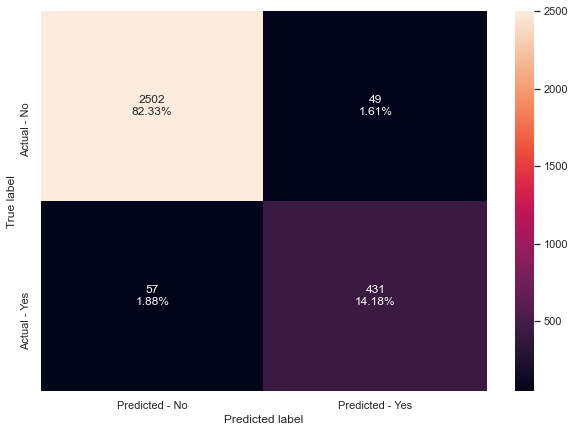

In [192]:
make_confusion_matrix(abc_tuned,y_test)

In [193]:
tuned_abc_acc = get_accuracy_score(abc_tuned)
tuned_abc_recall = get_recall_score(abc_tuned)
tuned_abc_precision = get_precision_score(abc_tuned)
tuned_abc_f1score  = get_f1_score(abc_tuned)

Accuracy on training set :  0.9977426636568849
Accuracy on test set :  0.9651201052977953
Recall on training set :  0.990342405618964
Recall on test set :  0.8831967213114754
Precision on training set :  0.9955869373345102
Precision on test set :  0.8979166666666667
f1 score on training set :  0.9929577464788734
f1 score  on test set :  0.8904958677685951


* Tunned Ada boost model looks good in terms of scores but there is significant difference between test and train score. This model took 4min 26 sec for running hyper parameter tunning.

### 8.3 Tunned Gradient Boosting Classifier

In [194]:
pipe_gbc = Pipeline([('scl', StandardScaler()), ('gbc', gbc)]) 

In [195]:
pipe_gbc.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('gbc', GradientBoostingClassifier(random_state=1))],
 'verbose': False,
 'scl': StandardScaler(),
 'gbc': GradientBoostingClassifier(random_state=1),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'gbc__ccp_alpha': 0.0,
 'gbc__criterion': 'friedman_mse',
 'gbc__init': None,
 'gbc__learning_rate': 0.1,
 'gbc__loss': 'deviance',
 'gbc__max_depth': 3,
 'gbc__max_features': None,
 'gbc__max_leaf_nodes': None,
 'gbc__min_impurity_decrease': 0.0,
 'gbc__min_impurity_split': None,
 'gbc__min_samples_leaf': 1,
 'gbc__min_samples_split': 2,
 'gbc__min_weight_fraction_leaf': 0.0,
 'gbc__n_estimators': 100,
 'gbc__n_iter_no_change': None,
 'gbc__random_state': 1,
 'gbc__subsample': 1.0,
 'gbc__tol': 0.0001,
 'gbc__validation_fraction': 0.1,
 'gbc__verbose': 0,
 'gbc__warm_start': False}

In [196]:
%%time
# Choose the type of classifier. 
init=AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "gbc__init":[init],
    "gbc__n_estimators": [100,150,200,250],
    "gbc__subsample":[0.8,0.9,1],
    "gbc__max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(pipe_gbc, parameters, scoring=acc_scorer,cv=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

Wall time: 11min 42s


Pipeline(steps=[('scl', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            max_features=0.7, n_estimators=250,
                                            random_state=1, subsample=0.8))])

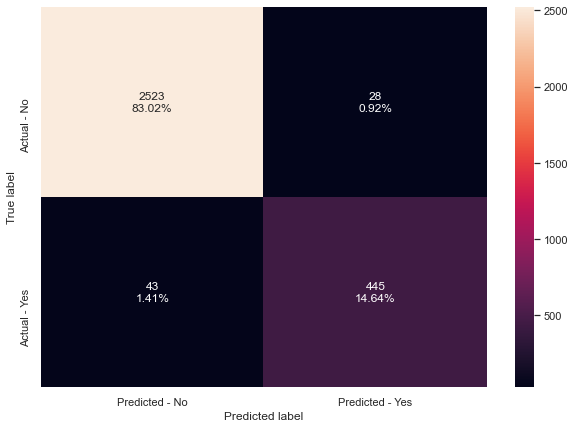

In [197]:
make_confusion_matrix(gbc_tuned,y_test)

In [198]:
tuned_gbc_acc = get_accuracy_score(gbc_tuned)
tuned_gbc_recall = get_recall_score(gbc_tuned)
tuned_gbc_precision = get_precision_score(gbc_tuned)
tuned_gbc_f1score  = get_f1_score(gbc_tuned)

Accuracy on training set :  0.988431151241535
Accuracy on test set :  0.9766370516617309
Recall on training set :  0.9482001755926251
Recall on test set :  0.9118852459016393
Precision on training set :  0.9791477787851315
Precision on test set :  0.9408033826638478
f1 score on training set :  0.9634255129348797
f1 score  on test set :  0.9261186264308012


* Scores are good and recall is almost .91 which is good. But this mdoel took 11 min 42 sec.

## 9.  Tuning Models -  Using RandomSearch with pipeline

###  9.1 Tuning Bagging Classifier

In [199]:
###checking the parameter
bagging.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [200]:

cl1=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
cl2=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
cl3=DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=1)


In [201]:
cl1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [202]:
pipe_bagging = Pipeline([('scl', StandardScaler()), ('bagging', bagging)]) 


In [203]:
pipe_bagging.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scl', 'bagging', 'scl__copy', 'scl__with_mean', 'scl__with_std', 'bagging__base_estimator', 'bagging__bootstrap', 'bagging__bootstrap_features', 'bagging__max_features', 'bagging__max_samples', 'bagging__n_estimators', 'bagging__n_jobs', 'bagging__oob_score', 'bagging__random_state', 'bagging__verbose', 'bagging__warm_start'])

In [204]:
# grid search for bagging classifier
param_random = {
               'bagging__base_estimator':[cl1,cl2,cl3], 
              'bagging__n_estimators':np.arange(5,50,3),
              'bagging__max_features':np.arange(0.5,1.0,0.1)
             }



In [205]:
%%time
scorer_recall = metrics.make_scorer(metrics.recall_score)


#Calling RandomizedSearchCV
bagging_tuned_random = RandomizedSearchCV(estimator= pipe_bagging , param_distributions=param_random, n_iter=50, cv=5, random_state=1,scoring=scorer_recall) 

#Fitting parameters in RandomizedSearchCV
bagging_tuned_random.fit( X_train, y_train) 

print("Best parameters are {} with CV score={}:" .format(bagging_tuned_random.best_params_,bagging_tuned_random.best_score_))
print(" Test set score: {:.2f}". format( bagging_tuned_random.score( X_test, y_test)))



Best parameters are {'bagging__n_estimators': 26, 'bagging__max_features': 0.8999999999999999, 'bagging__base_estimator': DecisionTreeClassifier(max_depth=5, random_state=1)} with CV score=0.8007110286730041:
 Test set score: 0.81
Wall time: 37.7 s


In [206]:

# Set the clf to the best combination of parameters
bagging_tuned_random = bagging_tuned_random.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned_random.fit(X_train, y_train)




Pipeline(steps=[('scl', StandardScaler()),
                ('bagging',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                         random_state=1),
                                   max_features=0.8999999999999999,
                                   n_estimators=26, random_state=1))])

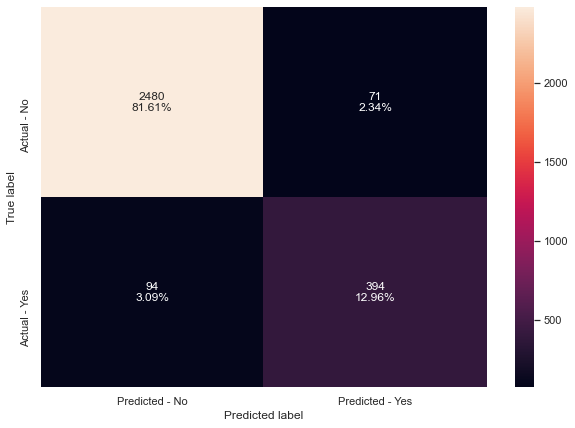

In [207]:
make_confusion_matrix(bagging_tuned_random,y_test)

In [208]:
tuned_bagging_acc= get_accuracy_score(bagging_tuned_random)
tuned_bagging_recall = get_recall_score(bagging_tuned_random)
tuned_bagging_precision = get_precision_score(bagging_tuned_random)
tuned_bagging_f1score  = get_f1_score(bagging_tuned_random)

Accuracy on training set :  0.9597911963882618
Accuracy on test set :  0.945705824284304
Recall on training set :  0.8366988586479368
Recall on test set :  0.8073770491803278
Precision on training set :  0.905893536121673
Precision on test set :  0.8473118279569892
f1 score on training set :  0.869922409858512
f1 score  on test set :  0.8268625393494229


* Tunned bagging claasifier with RandomSearchCV looks good and recall value is .80 for test data. It took 37.7 s.

### 9.2 Tunned Adaboost Model

In [209]:

# Creating pipeline
pipe_ada = Pipeline([('scl', StandardScaler()), ('adaboost', abc)]) 
pipe_ada.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('adaboost', AdaBoostClassifier(random_state=1))],
 'verbose': False,
 'scl': StandardScaler(),
 'adaboost': AdaBoostClassifier(random_state=1),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'adaboost__algorithm': 'SAMME.R',
 'adaboost__base_estimator': None,
 'adaboost__learning_rate': 1.0,
 'adaboost__n_estimators': 50,
 'adaboost__random_state': 1}

In [210]:
%%time


# Parameter grid to pass in RandomizedSearchCV
param_random = {
    "adaboost__n_estimators": np.arange(10, 110, 10),
    "adaboost__learning_rate": np.arange(.1, 1, .05),
    "adaboost__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned_random = RandomizedSearchCV(estimator=pipe_ada, param_distributions=param_random, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned_random.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned_random.best_params_,abc_tuned_random.best_score_))
print(" Test set score: {:.2f}". format( abc_tuned_random.score( X_test, y_test)))


Best parameters are {'adaboost__n_estimators': 100, 'adaboost__learning_rate': 0.20000000000000004, 'adaboost__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8779890254270036:
 Test set score: 0.90
Wall time: 2min


In [211]:

# Set the clf to the best combination of parameters
ada_tuned_random = abc_tuned_random.best_estimator_

# Fit the best algorithm to the data.
ada_tuned_random.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('adaboost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.20000000000000004,
                                    n_estimators=100, random_state=1))])

In [212]:
ada_tuned_random.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('adaboost',
   AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                            random_state=1),
                      learning_rate=0.20000000000000004, n_estimators=100,
                      random_state=1))],
 'verbose': False,
 'scl': StandardScaler(),
 'adaboost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                          random_state=1),
                    learning_rate=0.20000000000000004, n_estimators=100,
                    random_state=1),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'adaboost__algorithm': 'SAMME.R',
 'adaboost__base_estimator__ccp_alpha': 0.0,
 'adaboost__base_estimator__class_weight': None,
 'adaboost__base_estimator__criterion': 'gini',
 'adaboost__base_estimator__max_depth': 3,
 'adaboost__base_estimator__max_features': None,
 'adaboost__b

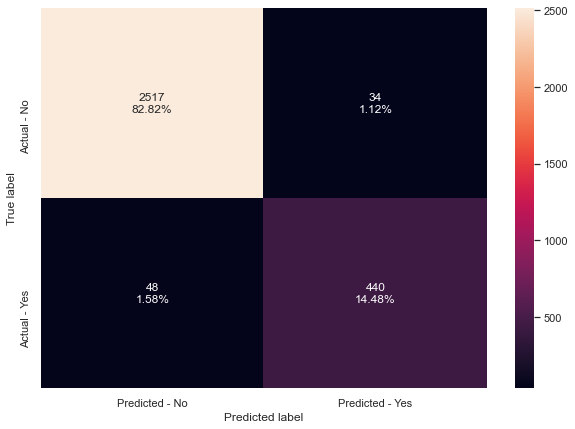

In [213]:
make_confusion_matrix(ada_tuned_random,y_test)

In [214]:
tuned_abc_acc = get_accuracy_score(ada_tuned_random)
tuned_abc_recall = get_recall_score(ada_tuned_random)
tuned_abc_precision = get_precision_score(ada_tuned_random)
tuned_abc_f1score  = get_f1_score(ada_tuned_random)

Accuracy on training set :  0.9929458239277652
Accuracy on test set :  0.9730174399473511
Recall on training set :  0.9692712906057945
Recall on test set :  0.9016393442622951
Precision on training set :  0.9865951742627346
Precision on test set :  0.9282700421940928
f1 score on training set :  0.9778565101860054
f1 score  on test set :  0.9147609147609147


* Tunned ada boost claasifier with RandomSearchCV looks good and recall value is .90 for test data. It took 2 mins.

### 9.3 Tunned  Gradient boosting Classifier 

In [215]:
pipe_gbc_random = Pipeline([('scl', StandardScaler()), ('gbc', gbc)]) 

In [216]:
pipe_gbc_random.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('gbc', GradientBoostingClassifier(random_state=1))],
 'verbose': False,
 'scl': StandardScaler(),
 'gbc': GradientBoostingClassifier(random_state=1),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'gbc__ccp_alpha': 0.0,
 'gbc__criterion': 'friedman_mse',
 'gbc__init': None,
 'gbc__learning_rate': 0.1,
 'gbc__loss': 'deviance',
 'gbc__max_depth': 3,
 'gbc__max_features': None,
 'gbc__max_leaf_nodes': None,
 'gbc__min_impurity_decrease': 0.0,
 'gbc__min_impurity_split': None,
 'gbc__min_samples_leaf': 1,
 'gbc__min_samples_split': 2,
 'gbc__min_weight_fraction_leaf': 0.0,
 'gbc__n_estimators': 100,
 'gbc__n_iter_no_change': None,
 'gbc__random_state': 1,
 'gbc__subsample': 1.0,
 'gbc__tol': 0.0001,
 'gbc__validation_fraction': 0.1,
 'gbc__verbose': 0,
 'gbc__warm_start': False}

In [217]:
%%time
# Choose the type of classifier. 
init=AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
param_random = {
    "gbc__init":[init],
    "gbc__n_estimators": np.arange(50, 250, 10),
    "gbc__subsample": np.arange(0.3,1.0,0.1),
    "gbc__max_features":np.arange(.1,1.0,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(pipe_gbc_random, param_random, scoring=acc_scorer,cv=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned_random = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_random.fit(X_train, y_train)

Wall time: 1min 47s


Pipeline(steps=[('scl', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            max_features=0.6, n_estimators=240,
                                            random_state=1,
                                            subsample=0.8000000000000003))])

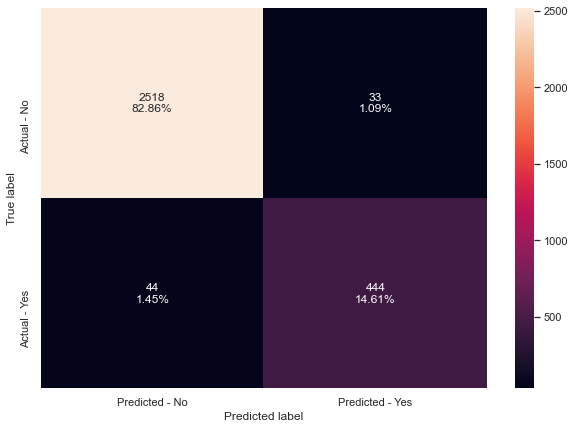

In [218]:
make_confusion_matrix(gbc_tuned_random,y_test)

In [219]:
tuned_gbc_acc = get_accuracy_score(gbc_tuned_random)
tuned_gbc_recall = get_recall_score(gbc_tuned_random)
tuned_gbc_precision = get_precision_score(gbc_tuned_random)
tuned_gbc_f1score  = get_f1_score(gbc_tuned_random)

Accuracy on training set :  0.9871613995485328
Accuracy on test set :  0.9746627179993419
Recall on training set :  0.9420544337137841
Recall on test set :  0.9098360655737705
Precision on training set :  0.9772313296903461
Precision on test set :  0.9308176100628931
f1 score on training set :  0.9593205185516317
f1 score  on test set :  0.9202072538860103


* Tunned Gradient boosting model looks good in  terms of scores and it took only 1 min 47 sec for running random search.

## 10.  Model performance evaluation-

### Comparing all the models tunned by grid search and randome search 

In [220]:
# defining list of models
models = [bagging_tunned,abc_tuned,gbc_tuned,bagging_tuned_random,ada_tuned_random,gbc_tuned_random]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train=[]
f1_score_test=[]

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    # f1 score
    m = get_f1_score(model,False)
    f1_score_train.append(m[0])
    f1_score_test.append(m[1])

In [221]:
comparison_frame = pd.DataFrame({'Model':['Bagging Classifier_grid','Ada Boosting_grid','Gredient Boosting_grid',
                                         'Bagging Classifier_random','Ada Boosting_random','Gredient Boosting_random'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_f1score': f1_score_train,
                                          'Test_f1score': f1_score_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0    Bagging Classifier_grid        0.954430       0.939454      0.837577   
1          Ada Boosting_grid        0.997743       0.965120      0.990342   
2     Gredient Boosting_grid        0.988431       0.976637      0.948200   
3  Bagging Classifier_random        0.959791       0.945706      0.836699   
4        Ada Boosting_random        0.992946       0.973017      0.969271   
5   Gredient Boosting_random        0.987161       0.974663      0.942054   

   Test_Recall  Train_Precision  Test_Precision  Train_f1score  Test_f1score  
0     0.825820         0.873626        0.802789       0.855222      0.814141  
1     0.883197         0.995587        0.897917       0.992958      0.890496  
2     0.911885         0.979148        0.940803       0.963426      0.926119  
3     0.807377         0.905894        0.847312       0.869922      0.826863  
4     0.901639         0.986595        0.928270       0.977857      0.914761  
5     0.909836         0.977231        0.930818       0.959321      0.920207

#### Best Model: 
 * After comparing these models, Tunned Ada boost model using random search turned out to be the best model. First it has good recall metrics for both train and test data. 
 * Also difference between all of the metrics for train and test data is minimum among all of the model. 
 * Random search CV took lesser time to do hyper parameter tunning in comparision to gRid search model.

### Creating tunned ada boost model using the best hyper parameters

In [222]:
best_model=   AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                            random_state=1),
                      learning_rate=0.20000000000000004, n_estimators=100,
                      random_state=1)
best_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.20000000000000004, n_estimators=100,
                   random_state=1)

In [223]:
tuned_gbc_acc = get_accuracy_score(best_model)
tuned_gbc_recall = get_recall_score(best_model)
tuned_gbc_precision = get_precision_score(best_model)
tuned_gbc_f1score  = get_f1_score(best_model)

Accuracy on training set :  0.9929458239277652
Accuracy on test set :  0.9730174399473511
Recall on training set :  0.9692712906057945
Recall on test set :  0.9016393442622951
Precision on training set :  0.9865951742627346
Precision on test set :  0.9282700421940928
f1 score on training set :  0.9778565101860054
f1 score  on test set :  0.9147609147609147


### Feature importance of Best  model- AdaBoosting classifier tunned using Random Search

In [224]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Total_Trans_Amt_log       0.273751
Total_Amt_Chng_Q4_Q1      0.118563
Total_Trans_Ct_log        0.107282
Total_Revolving_Bal       0.089062
Total_Ct_Chng_Q4_Q1       0.085217
Credit_Limit_log          0.076031
Customer_Age_log          0.057007
Total_Relationship_Count  0.045390
Avg_Utilization_Ratio     0.036962
Months_Inactive_12_mon    0.033803
Contacts_Count_12_mon     0.028696
Marital_Status            0.015547
Education_Level           0.011181
Dependent_count           0.008703
Income_Category           0.005718
Gender                    0.004887
Card_Category             0.002200


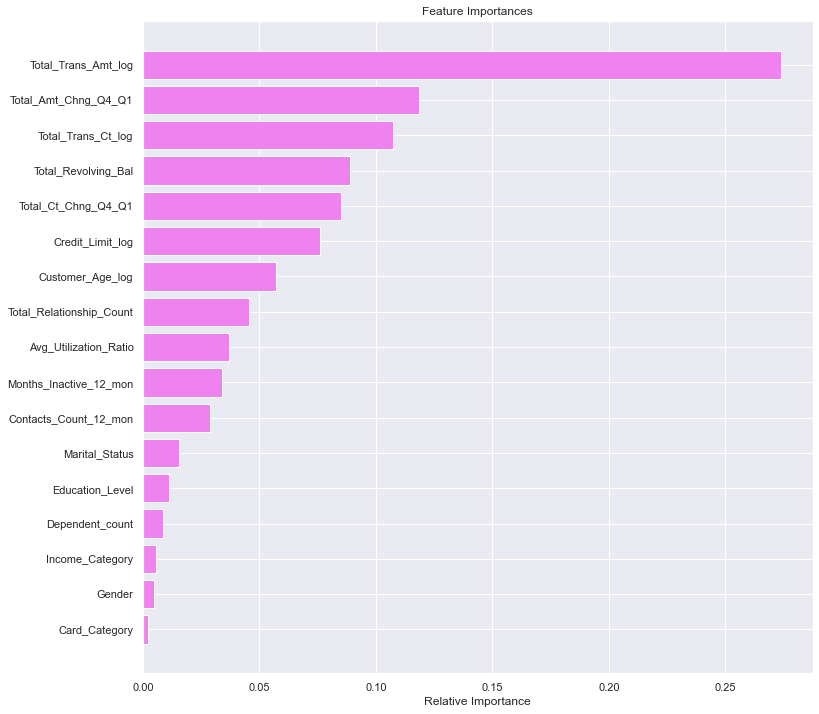

In [225]:
feature_names = X_train.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 11. Actionable insights and  Recommendation for business

* Customers who had total Transaction Amount almost lesser than 4000, had attrited. Bank should focus on customers who had spent small transaction amount in last 12 months.
* •	Total_Amt_Chng_Q4_Q1 has the second highest feature important. 
* Customers who had total transaction count less than 50 got attrited. Bank should focus on customers who had less than 50 transaction counts in last months as they are more prone to attrite.
* Customers who had revolving balance less than 1000, had attrited. Bank should focus on customers with total revolving balance lesser than 1000 as they are more prone to attrite.
* Credit_Limit has good feature importance but it's not clear from data analysis if there is a pattern.
* Customer age: 

    * Bank should focus on Customer with age 30-60 and Avg_Utilization_ratio less than .2 as they are more porne to attrite.
    * Bank should focus on Customer with age 35-60 and total_trans_amt less than 4000 were attrited.
    * Bank should focus on Customer with age 30-70 and total_revolving_bal less than 1000 were attrited.
* Bank should focus on customers who had less  no of relationship count (only 1-2).


